In [1]:
import pandas as pd

In [ ]:
import os
os.getcwd()

In [2]:
df_empresas_estab_mg = pd.read_csv("data/df_empresas_estab_mg.csv")
df_naturezas = pd.read_csv("data/Naturezas0.csv")
df_cnaes = pd.read_csv("data/Cnaes0.csv")


Quantidade de empresas, temos 5761705 empresas que foram registradas

In [3]:
df_empresas_estab_mg.shape

(5761705, 14)

Verificando o número de empresas por status

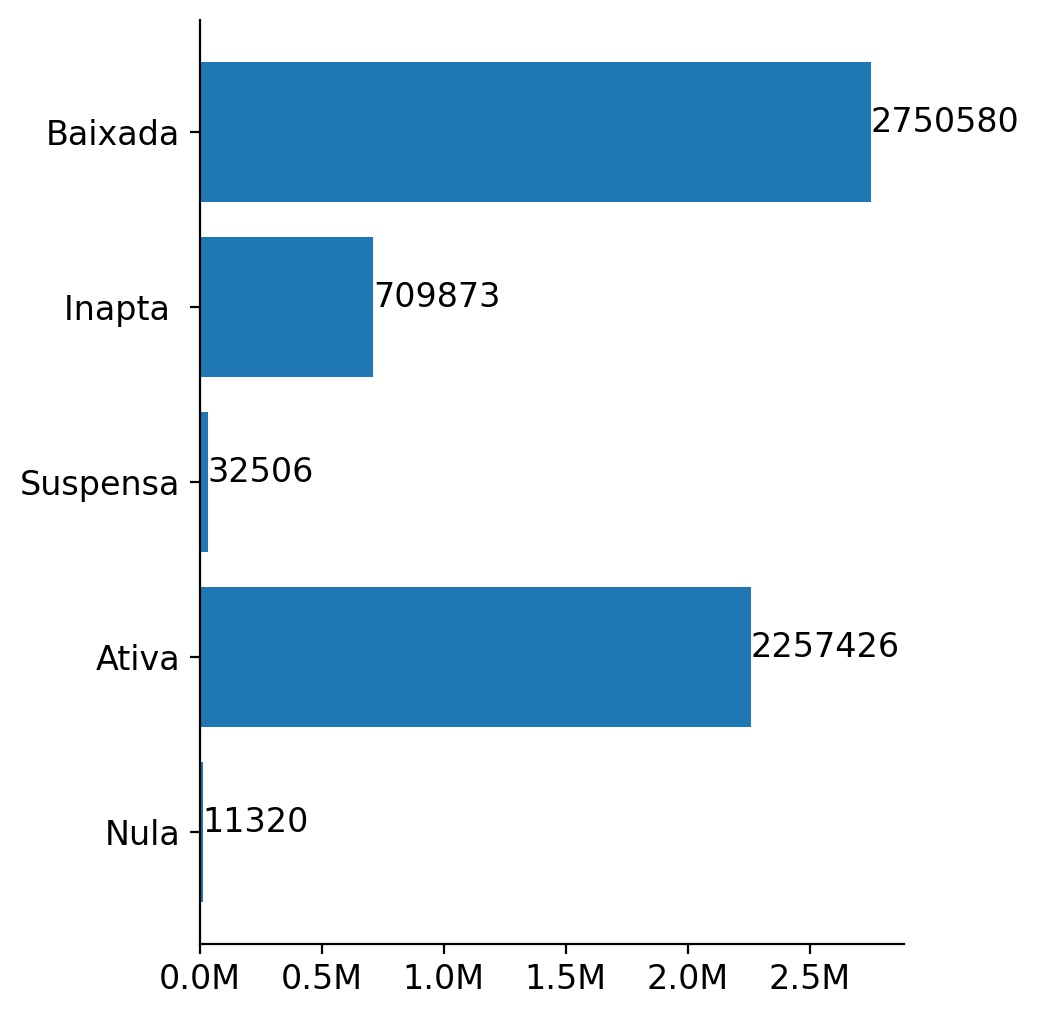

In [4]:
import matplotlib.pyplot as plt

#names = ['1 - Nula', '2 - Ativa', '3 - Suspensa', '4 - Inapta ', '8 - Baixada']
names = ['Nula', 'Ativa', 'Suspensa', 'Inapta ', 'Baixada']
import matplotlib.ticker as ticker

@ticker.FuncFormatter
def million_formatter(x, pos):
    return "%.1fM" % (x/1E6)

dpi = 200
values = df_empresas_estab_mg.groupby('SITUAÇÃO CADASTRAL')['cnpj'].count().values
fig = plt.figure(figsize=(10, 6), dpi=dpi)
ax=fig.add_subplot(121)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(million_formatter)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

ax.barh(names, values)
for i, v in enumerate(values):
    ax.text(v + 3, i , str(v), fontsize=12)


Verificando a quantidade de empresas registradas, observa-se alguns grandes picos, possivelmente por conta de registros da receita federal

In [6]:
df_empresas_estab_mg['DATA DE INÍCIO ATIVIDADE'] = pd.to_datetime(df_empresas_estab_mg['DATA DE INÍCIO ATIVIDADE'])
df_count = df_empresas_estab_mg[df_empresas_estab_mg['DATA DE INÍCIO ATIVIDADE'] > '2010-01-01'].sort_values(by='DATA DE INÍCIO ATIVIDADE')

In [7]:
values = df_count.groupby(['DATA DE INÍCIO ATIVIDADE'])['cnpj'].count()

In [8]:
values.sort_values(ascending=False).head(10)

DATA DE INÍCIO ATIVIDADE
2012-07-05    42058
2016-08-15    24256
2020-09-26    23883
2016-08-13    15350
2020-09-23    13926
2016-08-16    12414
2020-09-25    11431
2012-07-06    11298
2020-09-24    10077
2016-08-12     9911
Name: cnpj, dtype: int64

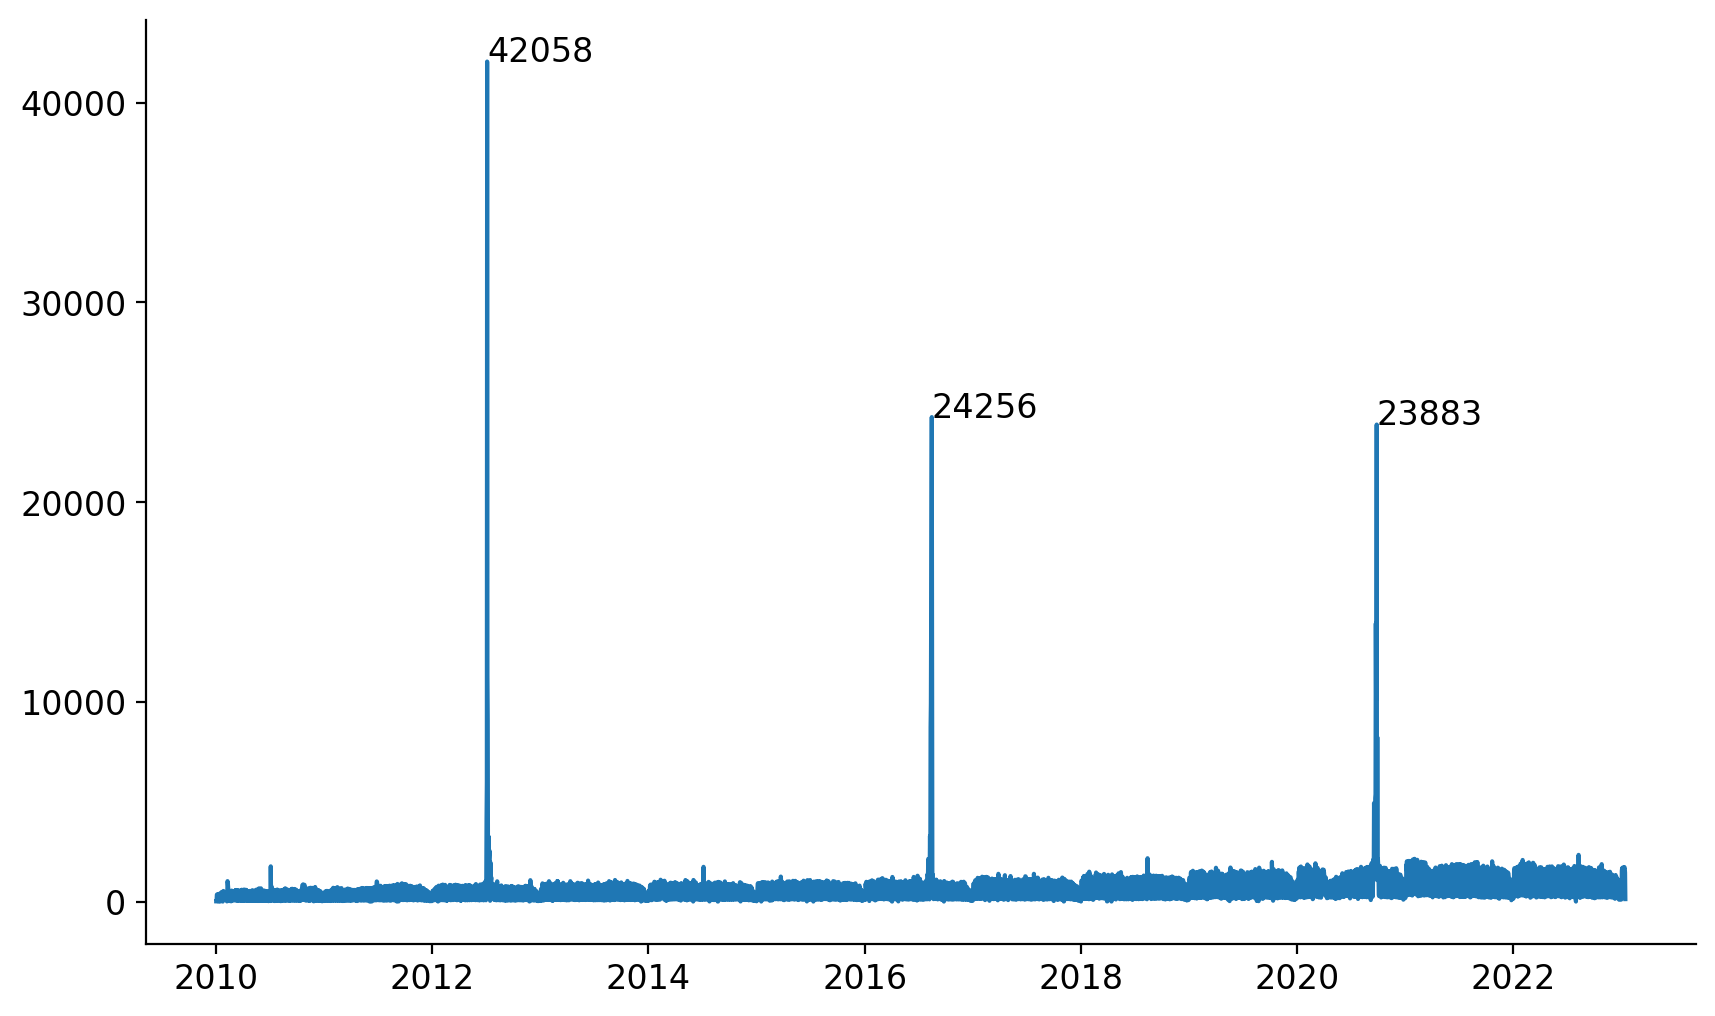

In [9]:
years = values.index
fig = plt.figure(figsize=(10, 6), dpi=dpi)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.xaxis.set_major_formatter(million_formatter)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.plot(years, values)
for i, v in enumerate(values):
    if str(years[i]) in ['2012-07-05 00:00:00', '2016-08-15 00:00:00', '2020-09-26 00:00:00']:
        ax.text(years[i], v, str(v) , fontsize = 12)

In [10]:
df_empresas_estab_mg[(df_empresas_estab_mg['DATA DE INÍCIO ATIVIDADE']=='2012-07-05')].groupby('SITUAÇÃO CADASTRAL')['cnpj'].count().sort_values(ascending=False)

SITUAÇÃO CADASTRAL
8    41713
2      254
4       88
3        2
1        1
Name: cnpj, dtype: int64

In [11]:
df_empresas_estab_mg[(df_empresas_estab_mg['DATA DE INÍCIO ATIVIDADE']=='2016-08-15')].groupby('SITUAÇÃO CADASTRAL')['cnpj'].count().sort_values(ascending=False)

SITUAÇÃO CADASTRAL
8    23897
2      242
4      117
Name: cnpj, dtype: int64

In [12]:
df_empresas_estab_mg[(df_empresas_estab_mg['DATA DE INÍCIO ATIVIDADE']=='2012-07-05')].groupby('SITUAÇÃO CADASTRAL')['cnpj'].count()

SITUAÇÃO CADASTRAL
1        1
2      254
3        2
4       88
8    41713
Name: cnpj, dtype: int64

In [13]:
df_empresas_estab_mg[df_empresas_estab_mg['DATA SITUAÇÃO CADASTRAL']=='2018-02-01']

,cnpj,NATUREZA,QUALIFICAÇÃO,CAPITAL,PORTE,CNPJ BÁSICO,CNPJ ORDEM,CNPJ DV,IDENTIFICADOR MATRIZ/FILIAL,SITUAÇÃO CADASTRAL,DATA SITUAÇÃO CADASTRAL,DATA DE INÍCIO ATIVIDADE,CNAE FISCAL PRINCIPAL,UF
46433,41711185,2135,50,"0,00",1.0,41711185,1,20,1,8,2018-02-01,1991-11-20,5611203,MG
51502,41736711,2135,50,"10000,00",1.0,41736711,1,6,1,8,2018-02-01,1991-12-03,4761003,MG
54908,41754193,2135,50,"0,00",1.0,41754193,1,53,1,8,2018-02-01,1991-12-27,4751201,MG
69216,41827718,2135,50,"0,00",1.0,41827718,1,33,1,8,2018-02-01,1992-02-25,4721102,MG
69756,41830712,2135,50,"15000,00",1.0,41830712,1,15,1,8,2018-02-01,1992-02-26,5611203,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5459797,38568028,2135,50,"0,00",5.0,38568028,1,0,1,8,2018-02-01,1990-05-11,5611203,MG
5476284,38642369,2135,50,"0,00",5.0,38642369,1,70,1,8,2018-02-01,1990-06-26,4712100,MG
5485651,38687935,2135,50,"0,00",1.0,38687935,1,60,1,8,2018-02-01,1994-11-09,4781400,MG
5499255,38747630,2135,50,"0,00",1.0,38747630,1,5,1,8,2018-02-01,1993-03-03,5611203,MG


In [14]:
df_empresas_estab_mg['DATA SITUAÇÃO CADASTRAL'] = pd.to_datetime(df_empresas_estab_mg['DATA SITUAÇÃO CADASTRAL'])

df_count = df_empresas_estab_mg[(df_empresas_estab_mg['DATA SITUAÇÃO CADASTRAL'] > '2010-01-01') & (df_empresas_estab_mg['SITUAÇÃO CADASTRAL'] != 2)].sort_values(by='DATA SITUAÇÃO CADASTRAL')

In [15]:
values = df_count.groupby(['DATA SITUAÇÃO CADASTRAL'])['cnpj'].count()

In [16]:
values.sort_values(ascending=False).head(10)

DATA SITUAÇÃO CADASTRAL
2018-02-01    121458
2012-12-31     85970
2015-02-09     84891
2021-02-28     81879
2016-12-31     79165
2021-03-31     74693
2021-03-30     74250
2021-04-16     53686
2018-12-06     37786
2019-01-24     34431
Name: cnpj, dtype: int64

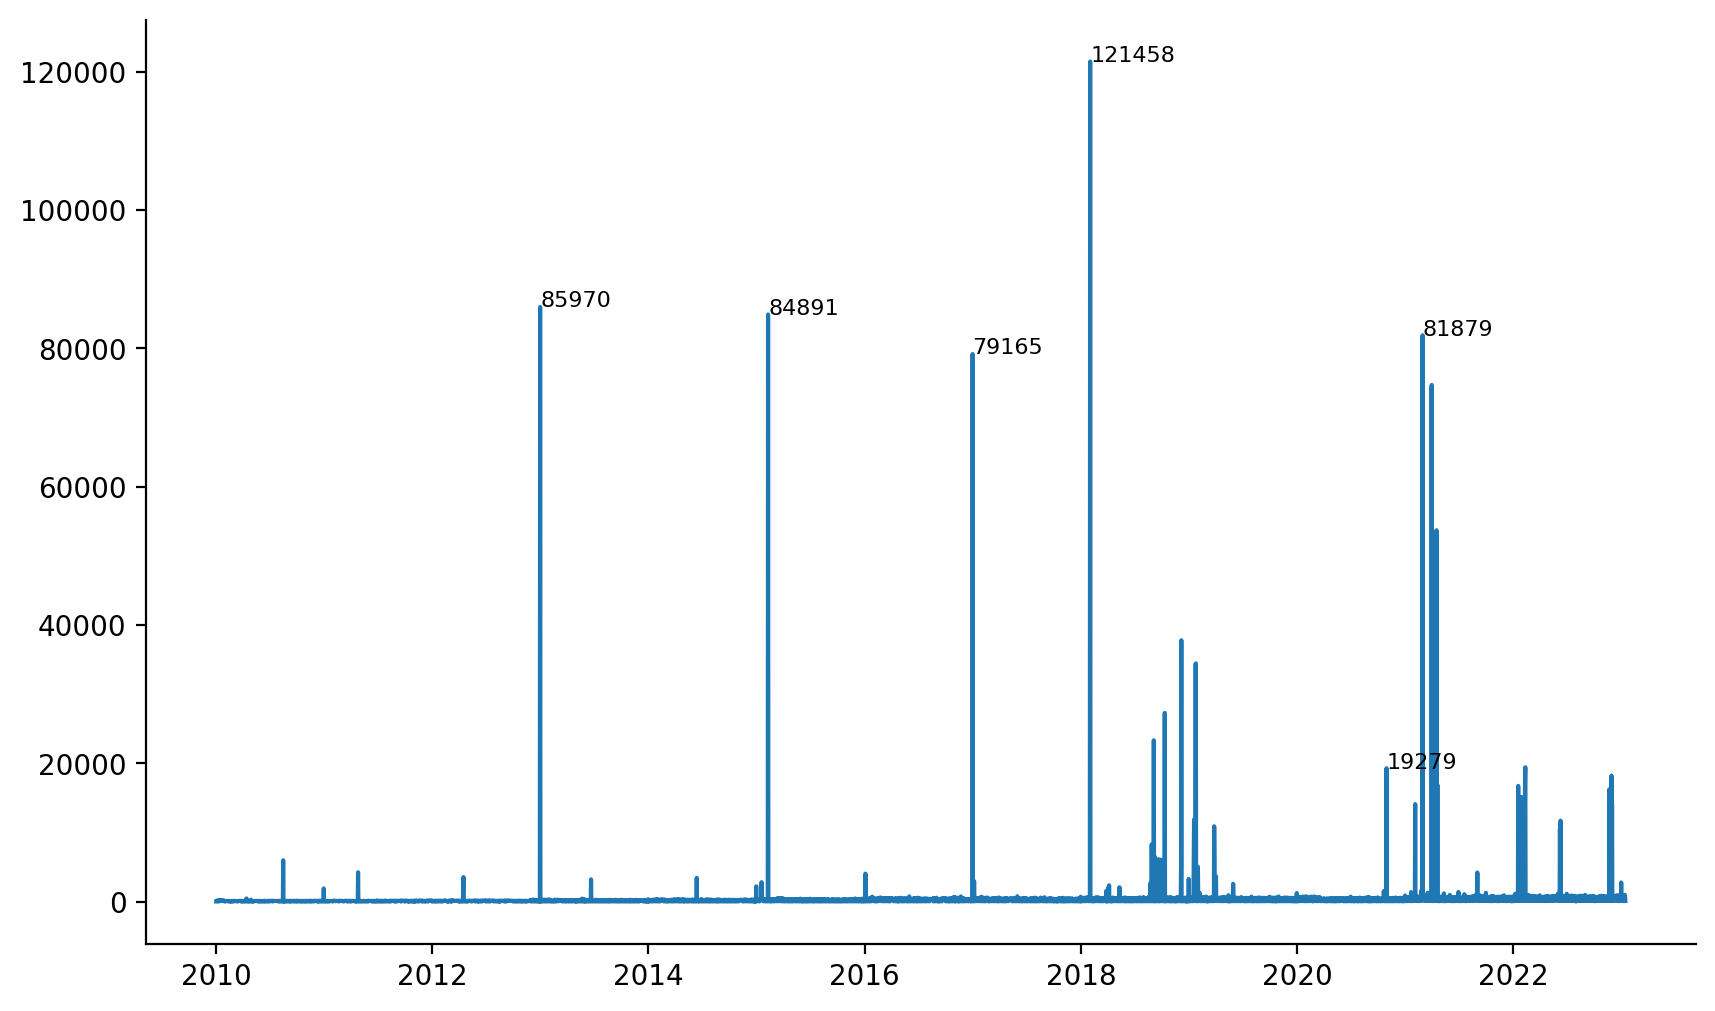

In [17]:
years = values.index
fig = plt.figure(figsize=(10, 6), dpi=dpi)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.xaxis.set_major_formatter(million_formatter)

ax.plot(years, values)
for i, v in enumerate(values):
    if str(years[i]) in ['2018-02-01 00:00:00', '2012-12-31 00:00:00', '2015-02-09 00:00:00', '2021-02-28 00:00:00', '2016-12-31 00:00:00', '2020-10-29 00:00:00']:
        ax.text(years[i], v, str(v) , fontsize = 8)

Considerando as empresas Baixadas, Inaptas e Suspensas como Inativas e Ativa como ativa, temos o seguinte grafico ao longo do tempo

In [18]:
df_empresas_estab_mg['DATA DE INÍCIO ATIVIDADE'] = pd.to_datetime(df_empresas_estab_mg['DATA DE INÍCIO ATIVIDADE'])
df_count_year = df_empresas_estab_mg[(df_empresas_estab_mg['DATA DE INÍCIO ATIVIDADE']>'2010-01-01')]
df_count_year['y - DATA DE INÍCIO ATIVIDADE'] = df_count_year['DATA DE INÍCIO ATIVIDADE'].dt.strftime("%Y")


C:\Users\leand\AppData\Local\Temp\ipykernel_14192\478737258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_year['y - DATA DE INÍCIO ATIVIDADE'] = df_count_year['DATA DE INÍCIO ATIVIDADE'].dt.strftime("%Y")


Quantidade de empresas que iniciaram a atividade ao longo do tempo a partir do ano 2010

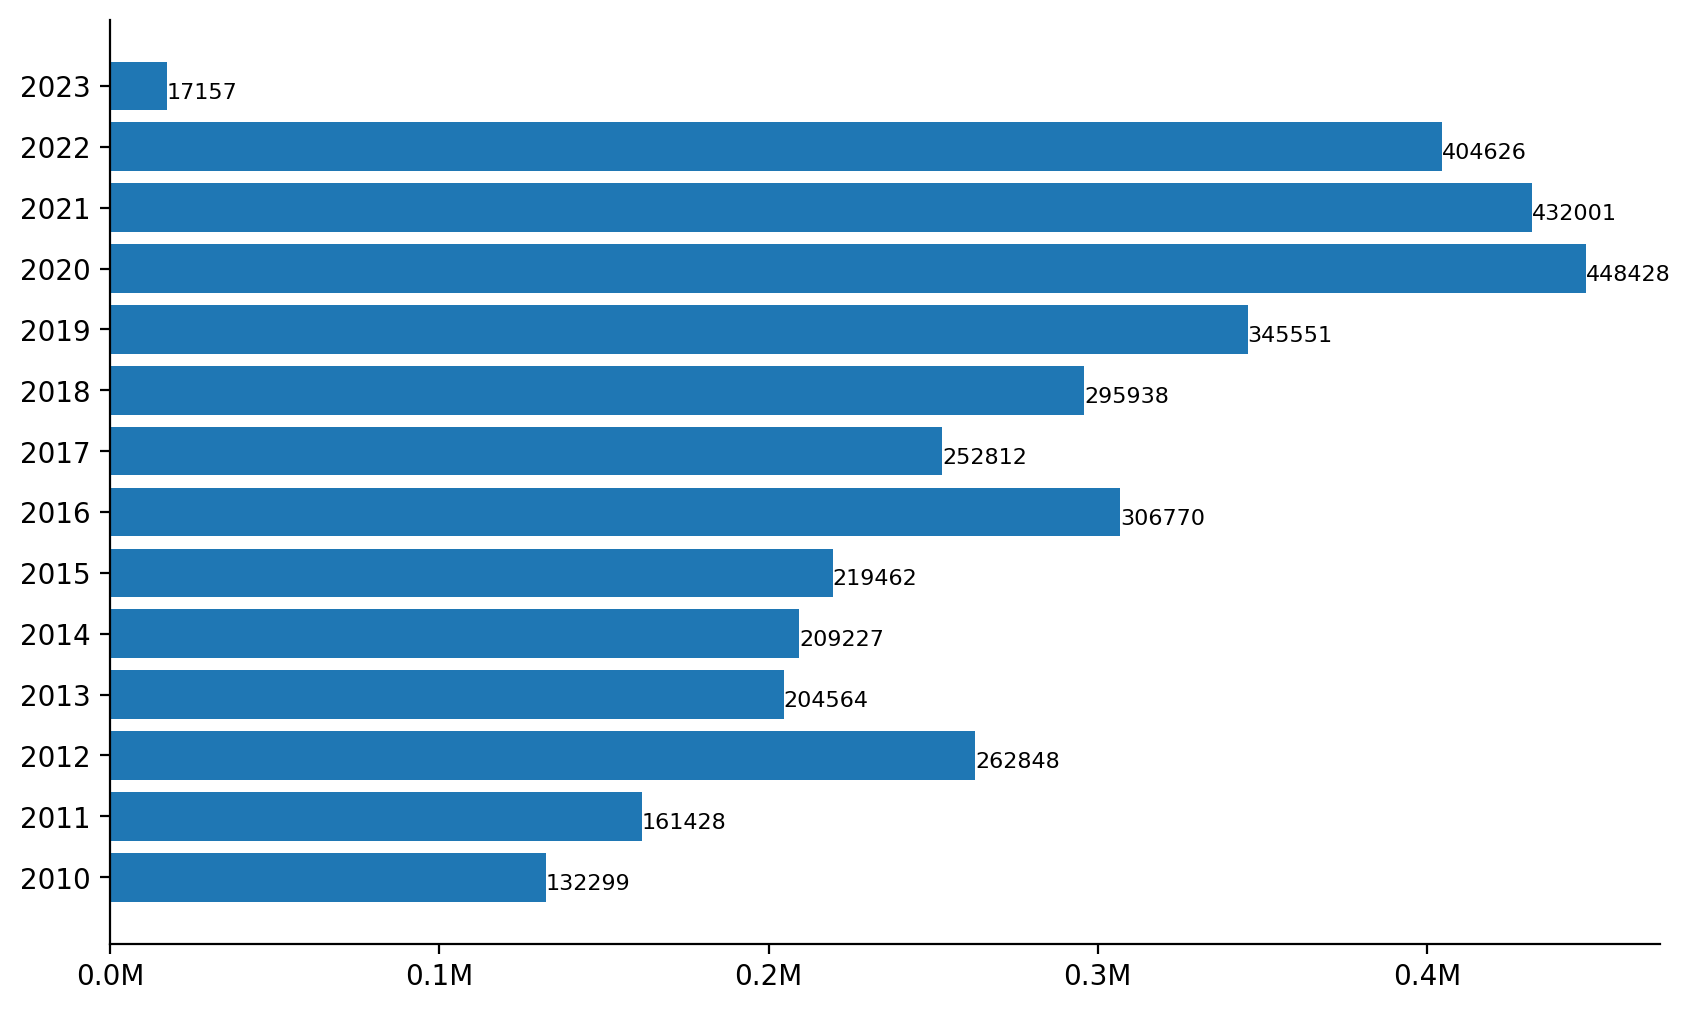

In [19]:
values = df_count_year.groupby(['y - DATA DE INÍCIO ATIVIDADE'])['cnpj'].count()
years = [str(x) for x in range(2010, 2024)]
fig = plt.figure(figsize=(10, 6), dpi=dpi)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(million_formatter)

ax.barh(years, values)
for i, v in enumerate(values):
    ax.text(v, i - 0.2 , str(v) , fontsize =8)

In [20]:
df_empresas_estab_mg

,cnpj,NATUREZA,QUALIFICAÇÃO,CAPITAL,PORTE,CNPJ BÁSICO,CNPJ ORDEM,CNPJ DV,IDENTIFICADOR MATRIZ/FILIAL,SITUAÇÃO CADASTRAL,DATA SITUAÇÃO CADASTRAL,DATA DE INÍCIO ATIVIDADE,CNAE FISCAL PRINCIPAL,UF
0,41273709,2135,50,"12000,00",1.0,41273709,1,48,1,2,2021-03-18,2021-03-18,4929901,MG
1,41273730,2135,50,"1000,00",1.0,41273730,1,43,1,2,2021-03-18,2021-03-18,4929901,MG
2,41273737,2135,50,"1000,00",1.0,41273737,1,65,1,3,2022-02-01,2021-03-18,7319002,MG
3,41273747,2135,50,"5000,00",1.0,41273747,1,9,1,2,2021-03-18,2021-03-18,3832700,MG
4,41273748,2135,50,"6000,00",1.0,41273748,1,45,1,8,2022-05-04,2021-03-18,5611201,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5761700,41273531,2135,50,"1000,00",1.0,41273531,1,35,1,8,2022-01-12,2021-03-18,4763603,MG
5761701,41273532,2135,50,"5000,00",1.0,41273532,1,80,1,2,2021-03-18,2021-03-18,4930201,MG
5761702,41273551,2135,50,"10000,00",1.0,41273551,1,6,1,8,2021-09-23,2021-03-18,4723700,MG
5761703,41273563,2062,49,"20000,00",1.0,41273563,1,30,1,2,2021-03-18,2021-03-18,8211300,MG


Fechadas vai ser com situação diferente de ativa e data situação cadastral

In [21]:
df_empresas_estab_mg['DATA SITUAÇÃO CADASTRAL'] = pd.to_datetime(df_empresas_estab_mg['DATA SITUAÇÃO CADASTRAL'])
df_empresas_estab_mg['y - DATA SITUAÇÃO CADASTRAL'] = df_empresas_estab_mg['DATA SITUAÇÃO CADASTRAL'].dt.strftime("%Y")


In [22]:
df_empresas_estab_mg['DATA SITUAÇÃO CADASTRAL'] = pd.to_datetime(df_empresas_estab_mg['DATA SITUAÇÃO CADASTRAL'])

df_count_year = df_empresas_estab_mg[(df_empresas_estab_mg['DATA SITUAÇÃO CADASTRAL']>'2010-01-01') & (df_empresas_estab_mg['SITUAÇÃO CADASTRAL'] != 2)]
df_count_year['y - DATA SITUAÇÃO CADASTRAL'] = df_count_year['DATA SITUAÇÃO CADASTRAL'].dt.strftime("%Y")


C:\Users\leand\AppData\Local\Temp\ipykernel_14192\3787200950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_year['y - DATA SITUAÇÃO CADASTRAL'] = df_count_year['DATA SITUAÇÃO CADASTRAL'].dt.strftime("%Y")


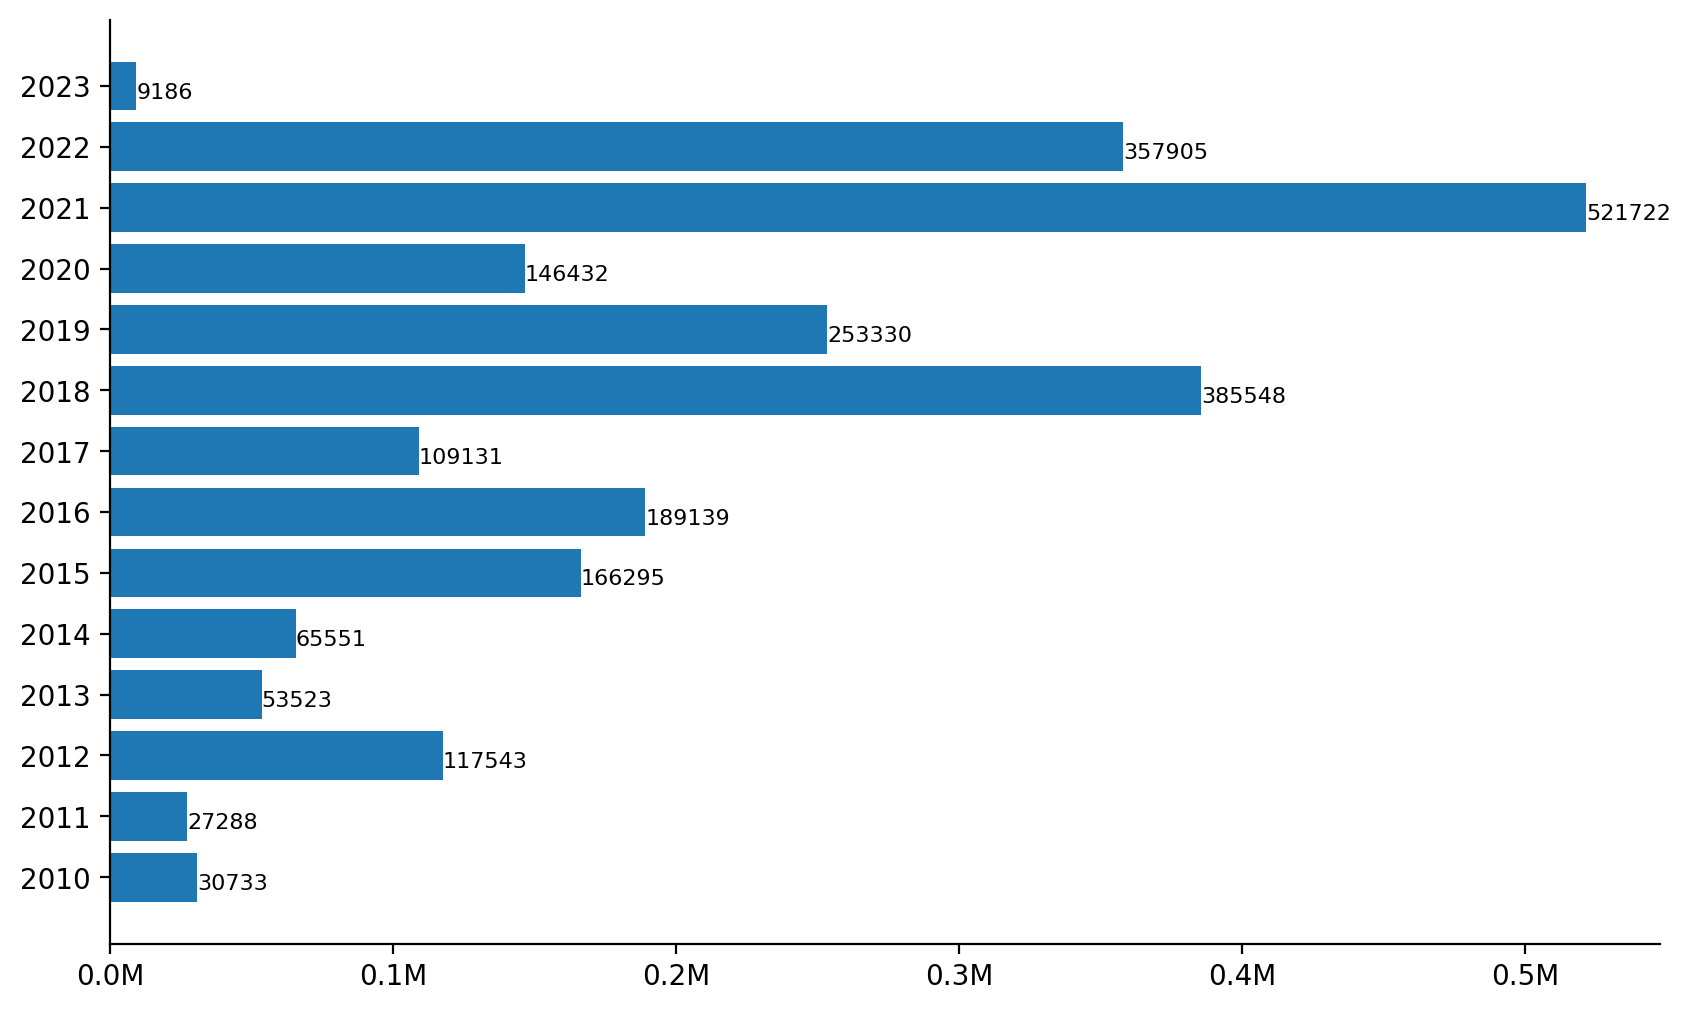

In [23]:
values_close = df_count_year.groupby(['y - DATA SITUAÇÃO CADASTRAL'])['cnpj'].count()
years = [str(x) for x in range(2010, 2024)]
fig = plt.figure(figsize=(10, 6), dpi=dpi)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(million_formatter)

ax.barh(years, values_close)
for i, v in enumerate(values_close):
    ax.text(v, i - 0.2 , str(v) , fontsize =8)

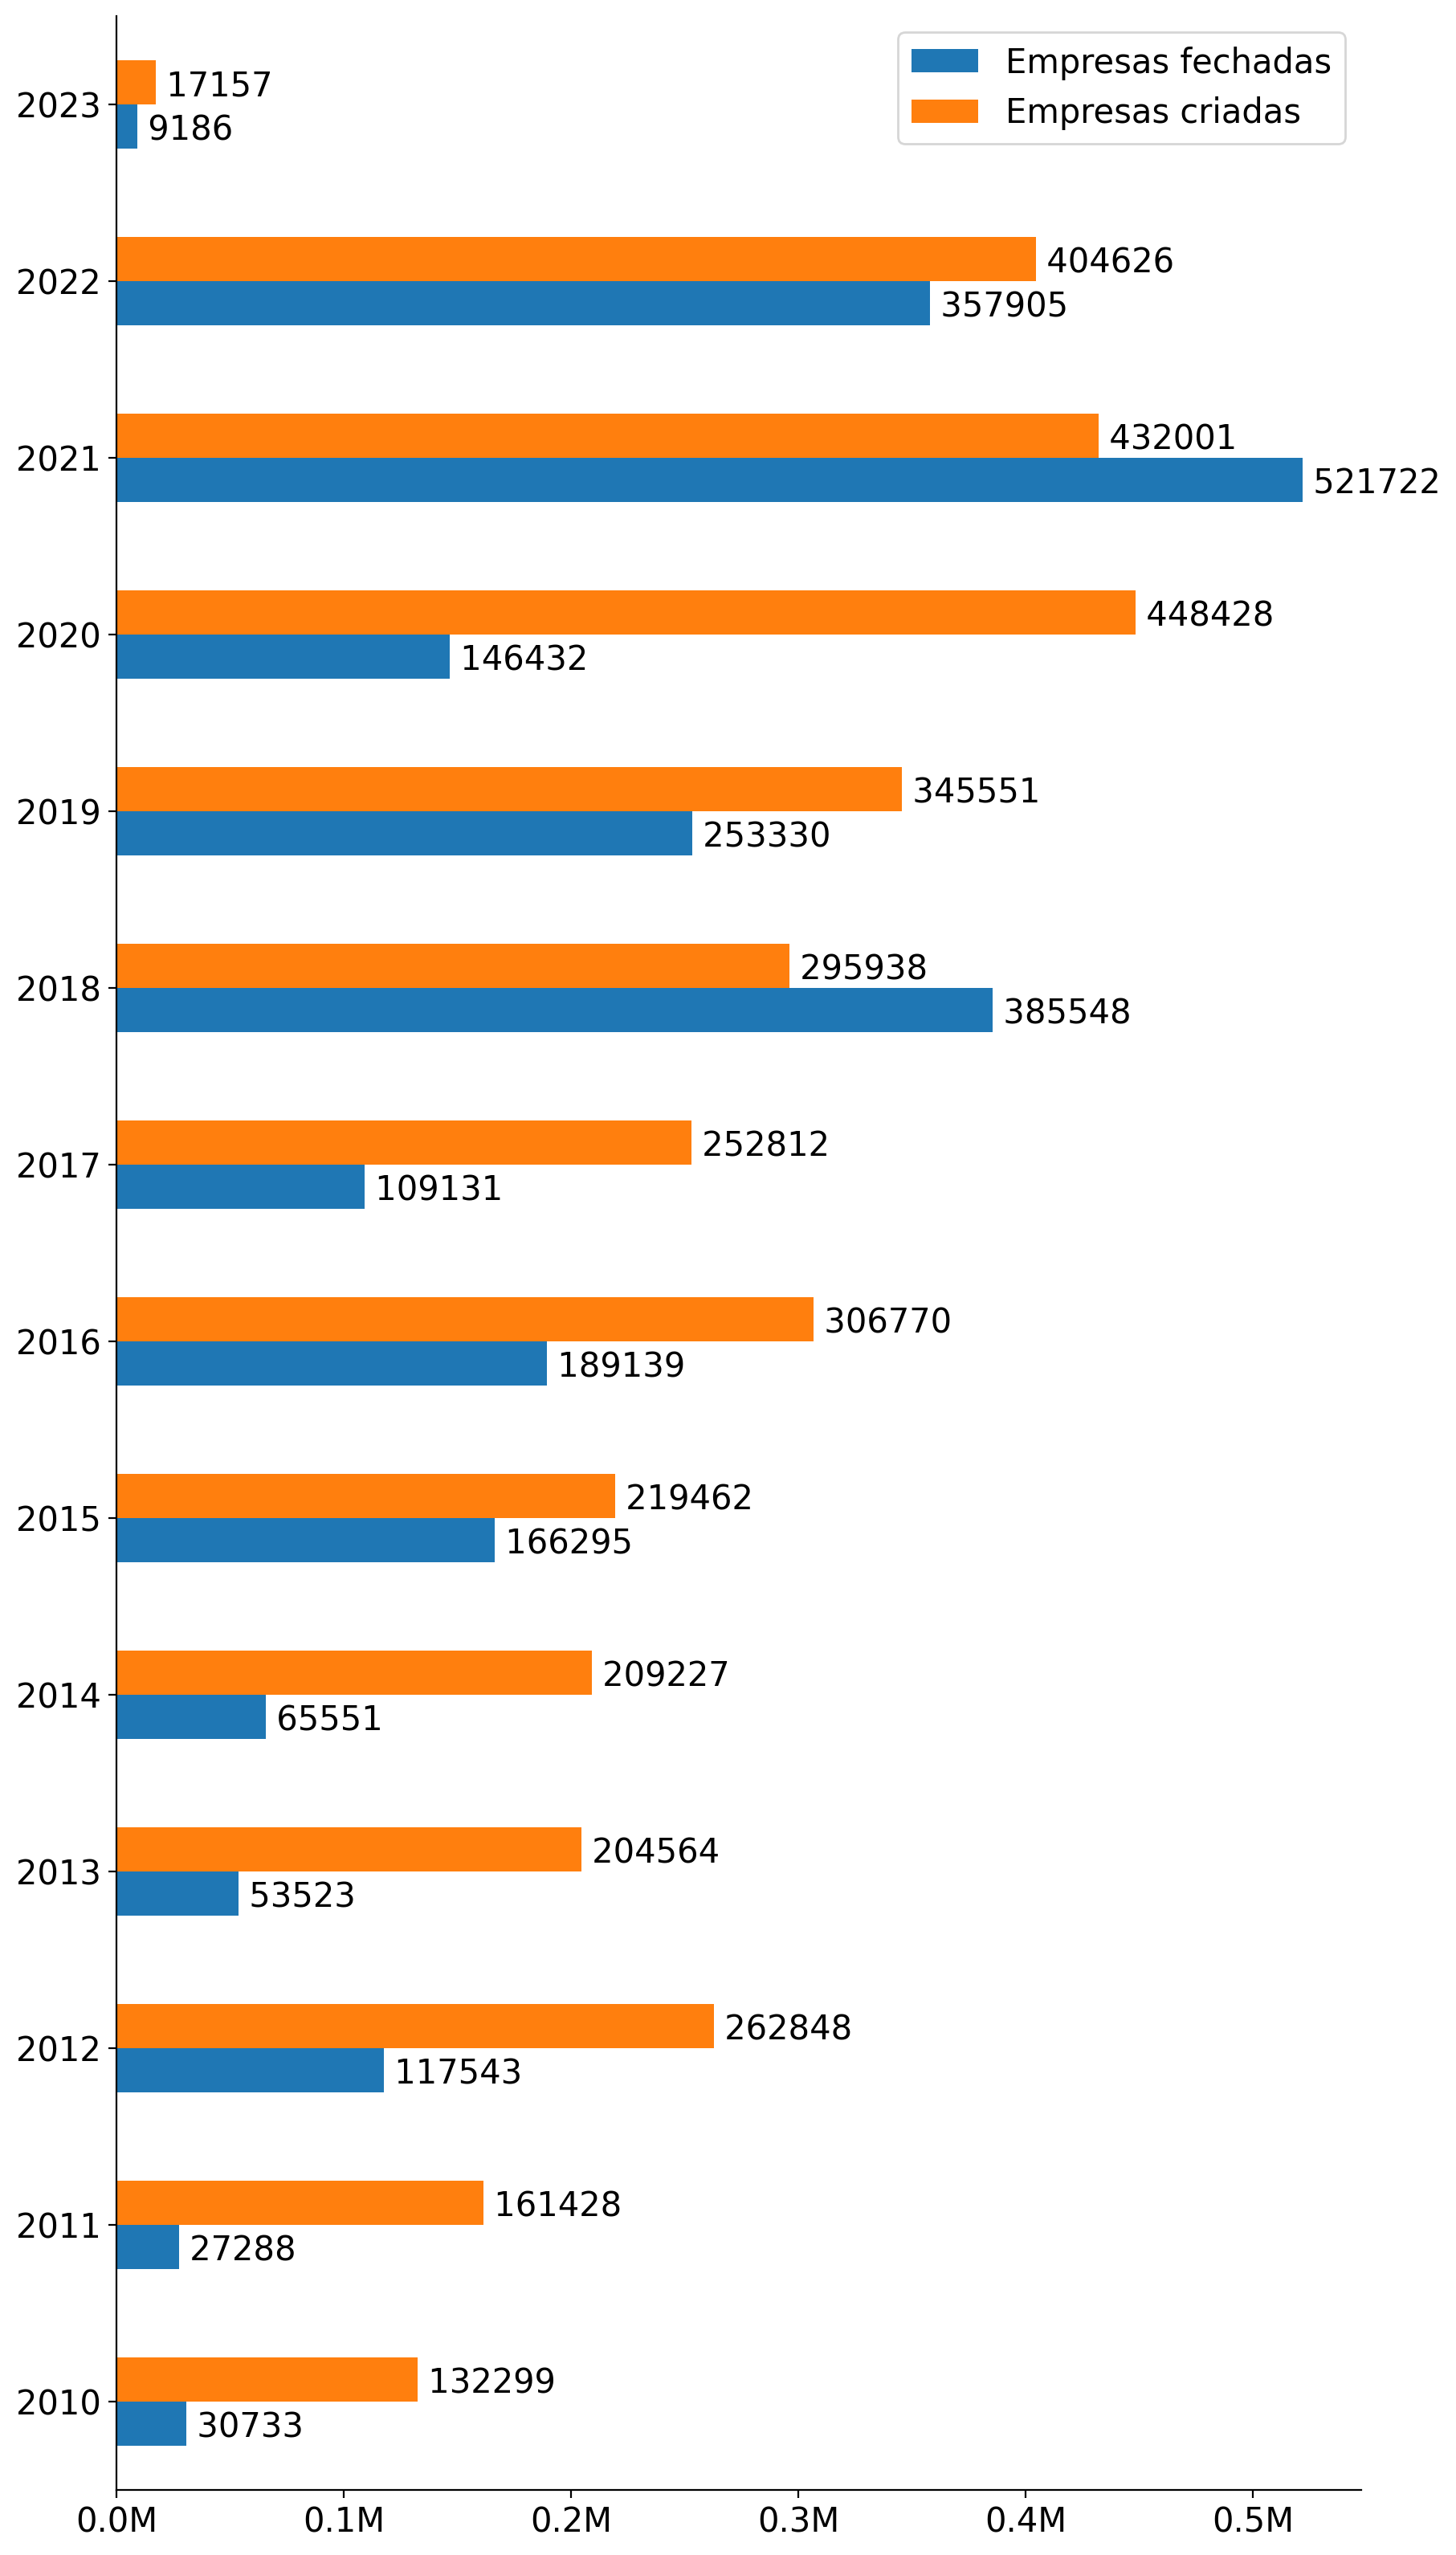

In [24]:
years = [str(x) for x in range(2010, 2024)]

fig = plt.figure(figsize=(10, 20), dpi=dpi)
ax = plt.gca()

df_plot = pd.DataFrame({'values_close':values_close, 'values':values,'index':years})
df_plot.plot.barh(ax=ax)
ax.legend(["Empresas fechadas", "Empresas criadas"], fontsize=15);

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(million_formatter)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

for i, v in enumerate(values_close):
    ax.text(v, i - 0.2 , ' '+ str(v) , fontsize=15)
for i, v in enumerate(values):
    ax.text(v-1, i + 0.05 , ' '+str(v) , fontsize=15)

In [25]:
df_empresas_estab_mg['DATA DE INÍCIO ATIVIDADE'] = pd.to_datetime(df_empresas_estab_mg['DATA DE INÍCIO ATIVIDADE'])
df_count_year = df_empresas_estab_mg[df_empresas_estab_mg['DATA DE INÍCIO ATIVIDADE']>'2000-01-01']
df_count_year['y - DATA DE INÍCIO ATIVIDADE'] = df_count_year['DATA DE INÍCIO ATIVIDADE'].dt.strftime("%Y")
# values = df_count_year.groupby(['y - DATA DE INÍCIO ATIVIDADE', 'NATUREZA'])['cnpj'].count()
df_count_year = df_count_year.merge(df_naturezas, left_on ='NATUREZA', right_on='codigo')


C:\Users\leand\AppData\Local\Temp\ipykernel_14192\3947076561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_year['y - DATA DE INÍCIO ATIVIDADE'] = df_count_year['DATA DE INÍCIO ATIVIDADE'].dt.strftime("%Y")


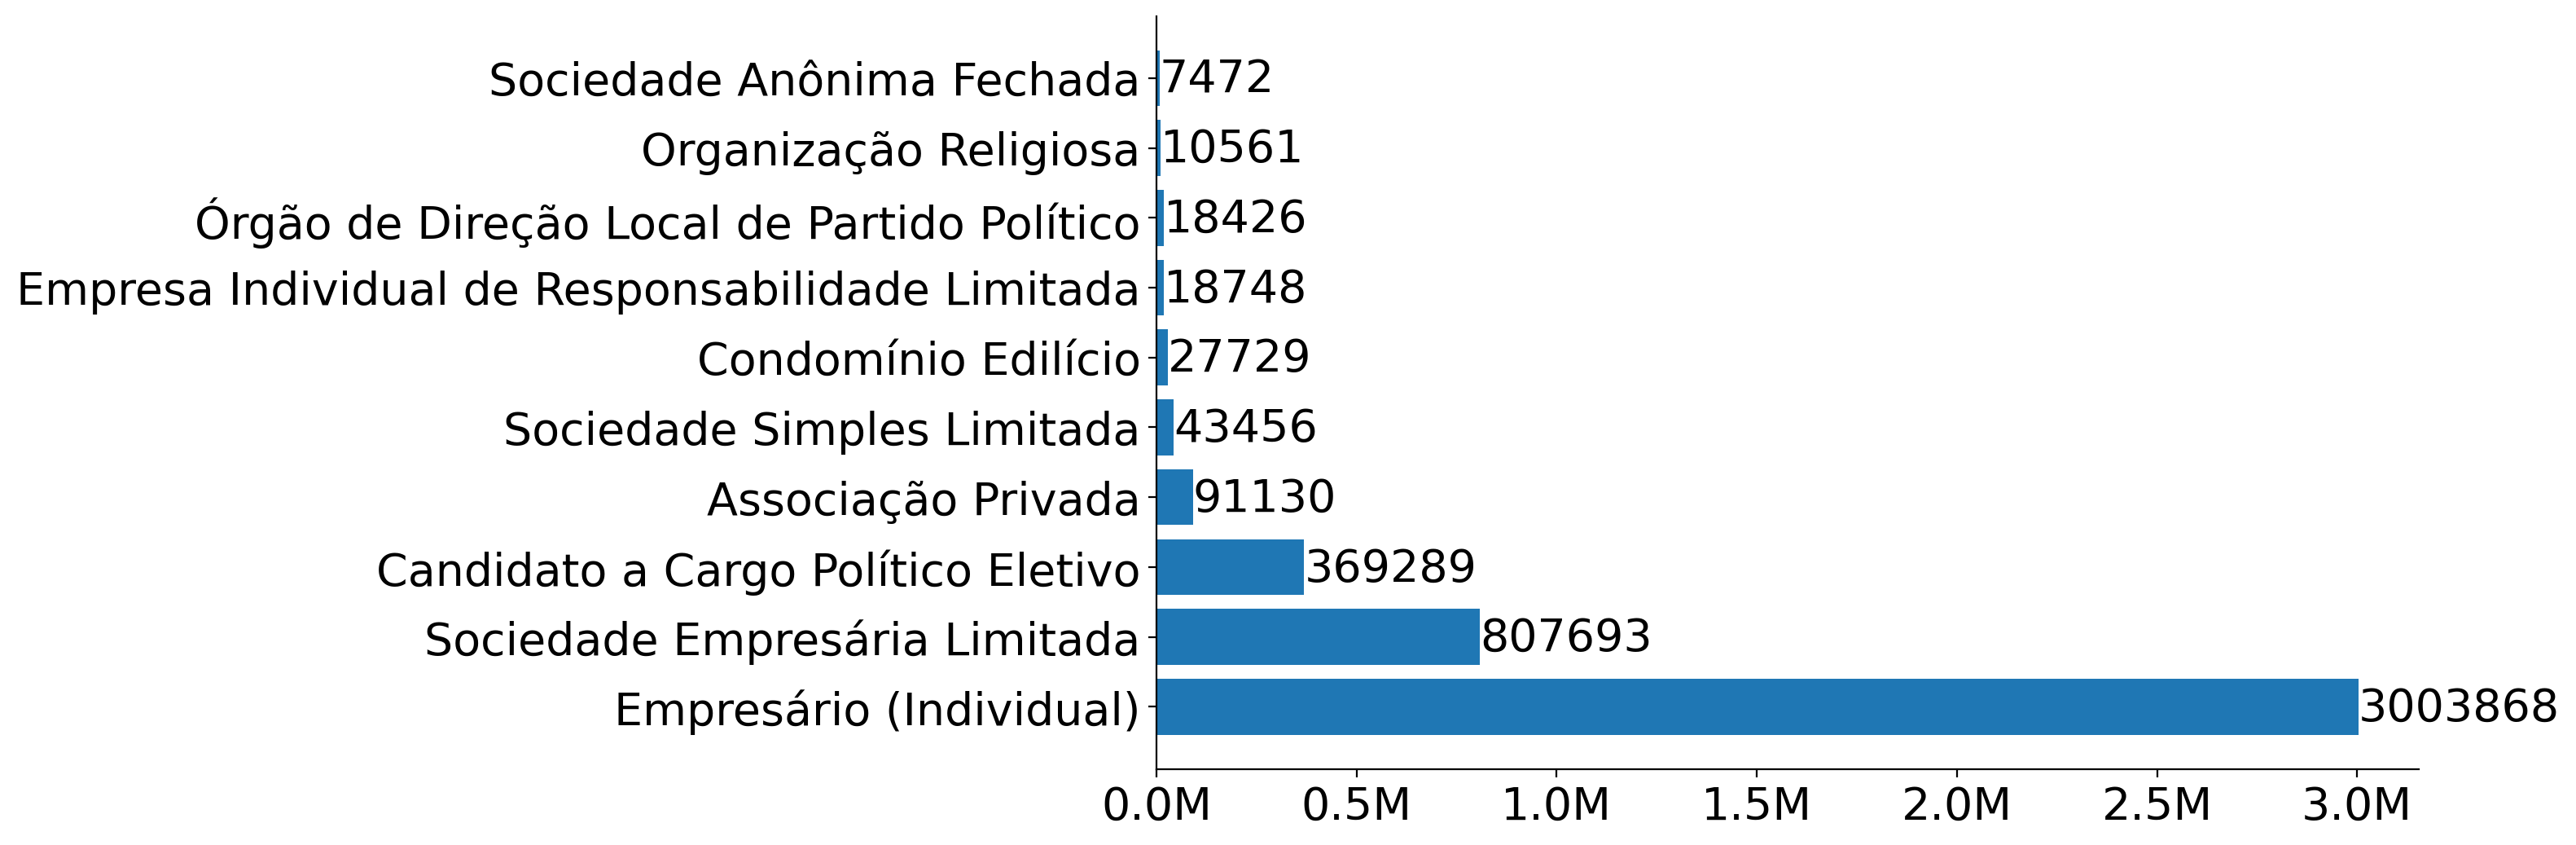

In [27]:
values = df_count_year.groupby(['Natureza Juridica'])['cnpj'].count()
values = values.sort_values(ascending=False).head(10)
years = [str(x) for x in values.index[:10]]
years[6] =  'Empresa Individual de Responsabilidade Limitada'
fig = plt.figure(figsize=(10, 6), dpi=dpi)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(million_formatter)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.barh(years, values.values)
for i, v in enumerate(values.values):
    ax.text(v, i - 0.2 , str(v) , fontsize = 20)

In [28]:
values

Natureza Juridica
Empresário (Individual)                                                     3003868
Sociedade Empresária Limitada                                                807693
Candidato a Cargo Político Eletivo                                           369289
Associação Privada                                                            91130
Sociedade Simples Limitada                                                    43456
Condomínio Edilício                                                           27729
Empresa Individual de Responsabilidade Limitada (de Natureza Empresária)      18748
Órgão de Direção Local de Partido Político                                    18426
Organização Religiosa                                                         10561
Sociedade Anônima Fechada                                                      7472
Name: cnpj, dtype: int64

C:\Users\leand\AppData\Local\Temp\ipykernel_14192\2993410122.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_year['y - DATA SITUAÇÃO CADASTRAL'] = df_count_year['DATA SITUAÇÃO CADASTRAL'].dt.strftime("%Y")
C:\Users\leand\AppData\Local\Temp\ipykernel_14192\2993410122.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_year['y - DATA SITUAÇÃO CADASTRAL'] = df_count_year['DATA SITUAÇÃO CADASTRAL'].dt.strftime("%Y")


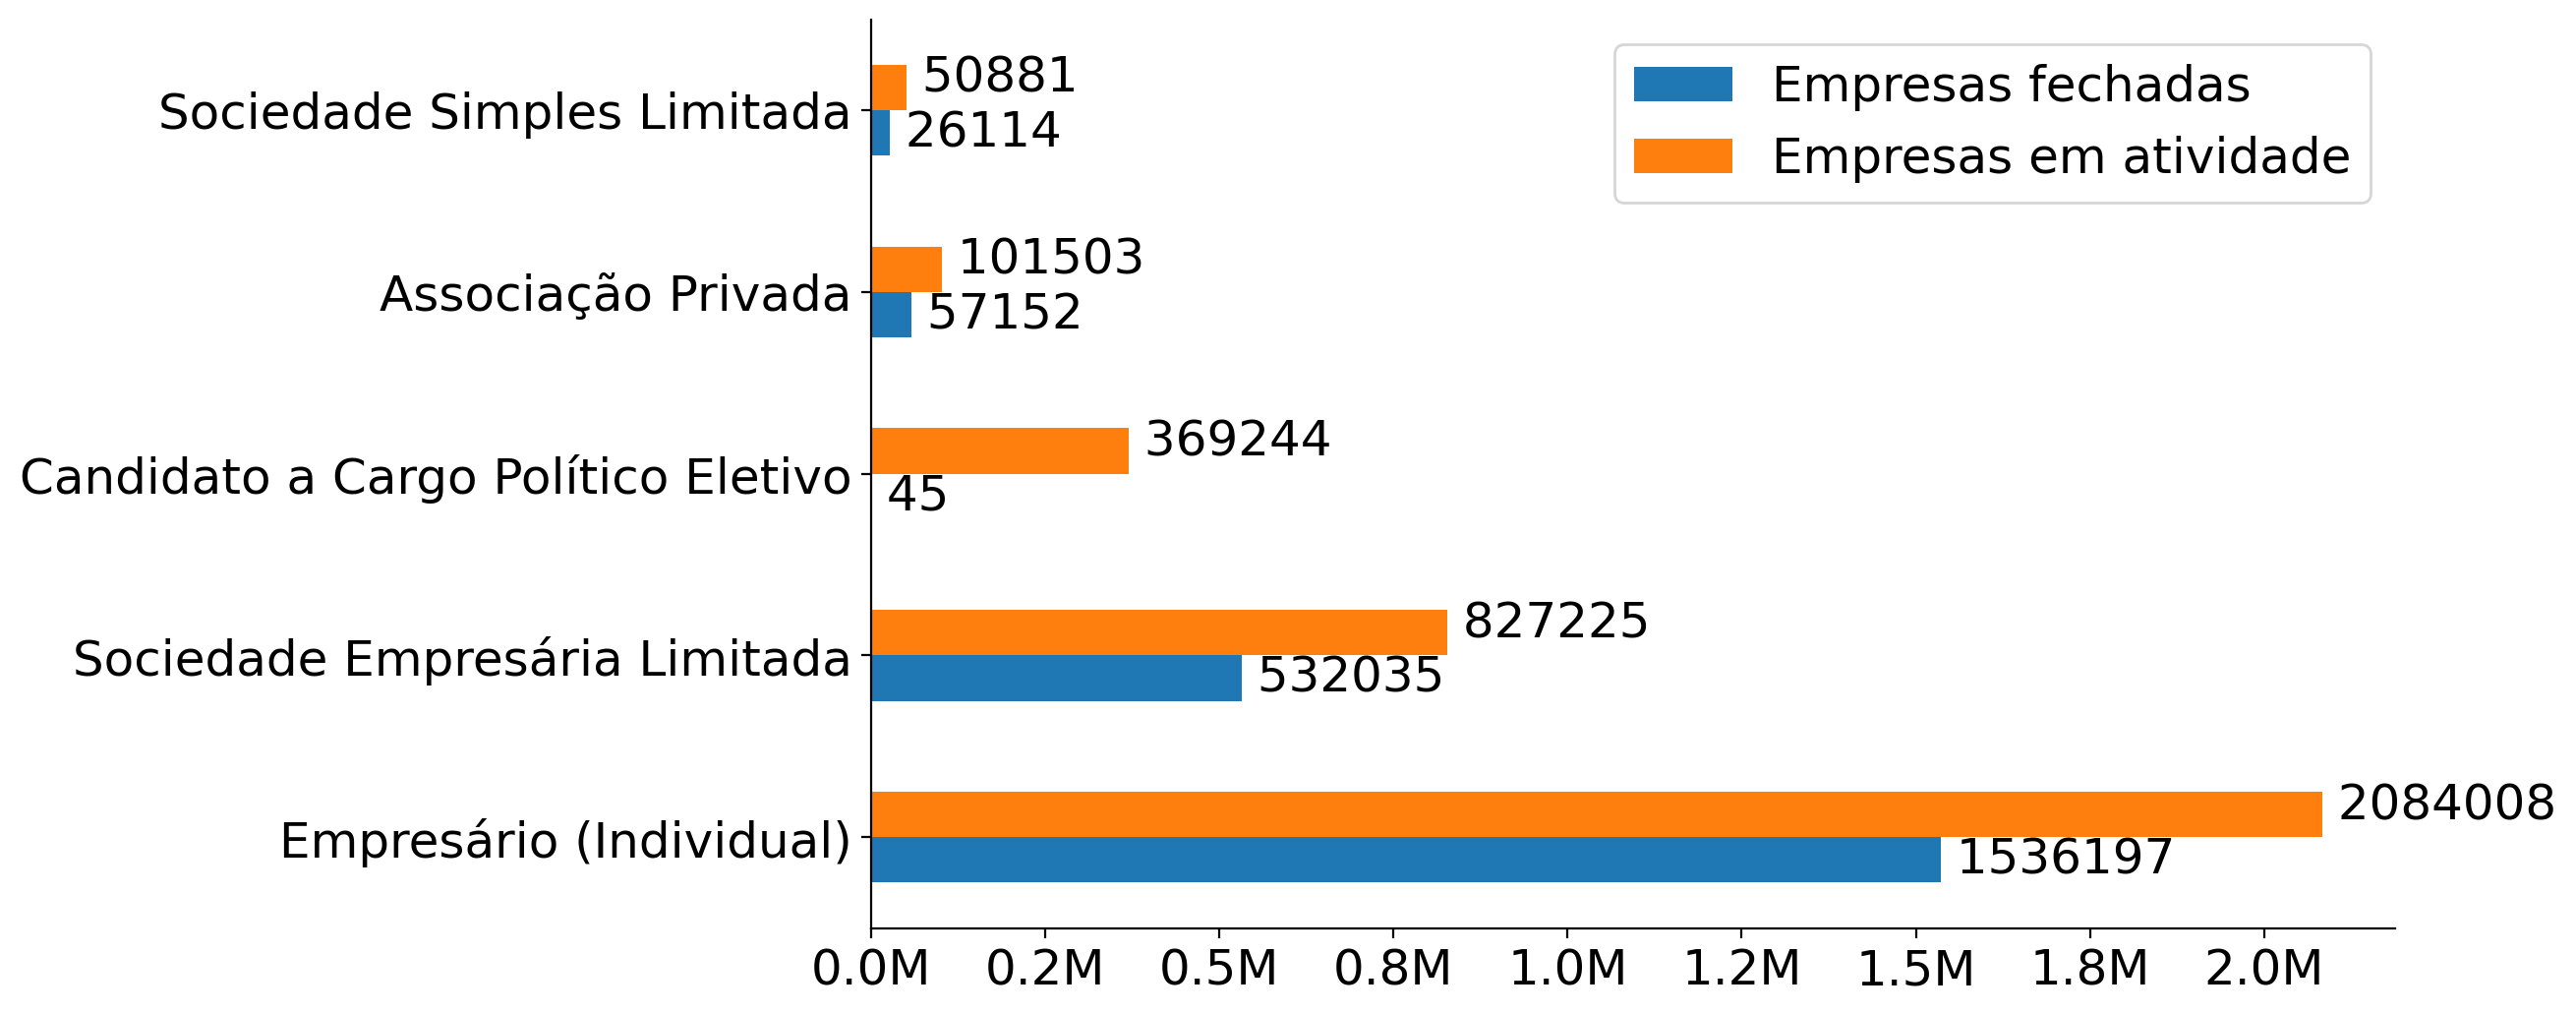

In [29]:
df_empresas_estab_mg['DATA SITUAÇÃO CADASTRAL'] = pd.to_datetime(df_empresas_estab_mg['DATA SITUAÇÃO CADASTRAL'])
indexes =  df_empresas_estab_mg.merge(df_naturezas, left_on ='NATUREZA', right_on='codigo')['Natureza Juridica'].unique()

df_count_year = df_empresas_estab_mg[df_empresas_estab_mg['SITUAÇÃO CADASTRAL'] != 2]
df_count_year['y - DATA SITUAÇÃO CADASTRAL'] = df_count_year['DATA SITUAÇÃO CADASTRAL'].dt.strftime("%Y")
df_count_year = df_count_year.merge(df_naturezas, left_on ='NATUREZA', right_on='codigo')

values = df_count_year.groupby(['Natureza Juridica'])['cnpj'].count()

for idx in indexes:
    if idx not in values.index:
        values[idx] = 0
    
values = values.sort_values(ascending=False)


df_count_year = df_empresas_estab_mg[df_empresas_estab_mg['SITUAÇÃO CADASTRAL'] == 2]

df_count_year['y - DATA SITUAÇÃO CADASTRAL'] = df_count_year['DATA SITUAÇÃO CADASTRAL'].dt.strftime("%Y")
df_count_year = df_count_year.merge(df_naturezas, left_on ='NATUREZA', right_on='codigo')

values_open = df_count_year.groupby(['Natureza Juridica'])['cnpj'].count()
for idx in indexes:
    if idx not in values_open.index:
        values_open[idx] = 0
values_open = values_open.sort_values(ascending=False)

fig = plt.figure(figsize=(10, 6), dpi=dpi)
ax = plt.gca()

df_plot = pd.DataFrame({'values_open':values_open, 'values':values,'index':indexes})
df_plot['order'] = df_plot['values_open'] + df_plot['values']

df_plot = df_plot.sort_values(by='order', ascending=False).head(5)
df_plot.drop(columns='order', inplace=True)

df_plot.plot.barh(ax=ax, xlabel='')
ax.legend(["Empresas fechadas", "Empresas em atividade"], fontsize=18);
ax.set(ylabel=None)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(million_formatter)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
for i, v in enumerate(df_plot['values_open']):
    ax.text(v, i - 0.2 , ' '+ str(v) , fontsize=18)
for i, v in enumerate(df_plot['values']):
    ax.text(v, i + 0.1 , ' '+str(v) , fontsize=18)

In [30]:
df_count_year = df_empresas_estab_mg
df_count_year = df_count_year.merge(df_cnaes, left_on ='CNAE FISCAL PRINCIPAL', right_on='CODIGO')


In [31]:
df_cnaes[df_cnaes['NOME DA ATIVIDADE ECONÔMICA']=='Atividades de organizações políticas']

,CODIGO,NOME DA ATIVIDADE ECONÔMICA
1323,9492800,Atividades de organizações políticas


In [32]:
df_ = df_count_year.groupby('CODIGO')['cnpj'].count().sort_values(ascending=False)
df_.to_frame().loc[9492800]

cnpj    422461
Name: 9492800, dtype: int64

In [33]:
df_

CODIGO
9492800    422461
4781400    340957
5611203    228313
8888888    214378
9602501    176832
            ...  
4623105         1
133401          1
321301          1
2814302         1
729402          1
Name: cnpj, Length: 1292, dtype: int64

In [34]:
df_empresas_estab_mg['DATA SITUAÇÃO CADASTRAL'] = pd.to_datetime(df_empresas_estab_mg['DATA SITUAÇÃO CADASTRAL'])
indexes =  df_cnaes['NOME DA ATIVIDADE ECONÔMICA']

df_count_year = df_empresas_estab_mg[df_empresas_estab_mg['SITUAÇÃO CADASTRAL'] != 2]
df_count_year['y - DATA SITUAÇÃO CADASTRAL'] = df_count_year['DATA SITUAÇÃO CADASTRAL'].dt.strftime("%Y")
df_count_year = df_count_year.merge(df_cnaes, left_on ='CNAE FISCAL PRINCIPAL', right_on='CODIGO')

values = df_count_year.groupby(['NOME DA ATIVIDADE ECONÔMICA'])['cnpj'].count()

for idx in indexes:
    if idx not in values.index:
        values[idx] = 0

values = values.sort_values(ascending=False)


df_count_year = df_empresas_estab_mg[df_empresas_estab_mg['SITUAÇÃO CADASTRAL'] == 2]

df_count_year['y - DATA SITUAÇÃO CADASTRAL'] = df_count_year['DATA SITUAÇÃO CADASTRAL'].dt.strftime("%Y")
df_count_year = df_count_year.merge(df_cnaes, left_on ='CNAE FISCAL PRINCIPAL', right_on='CODIGO')

values_open = df_count_year.groupby(['NOME DA ATIVIDADE ECONÔMICA'])['cnpj'].count()
for idx in indexes:
    if idx not in values_open.index:
        values_open[idx] = 0
values_open = values_open.sort_values(ascending=False)

# fig = plt.figure(figsize=(10, 6), dpi=dpi)
# ax = plt.gca()

df_plot = pd.DataFrame({'values_open':values_open, 'values':values,'index':indexes})

df_plot['order'] = df_plot['values_open'] + df_plot['values']
df_plot = df_plot.sort_values(by='order', ascending=False).head(20)
df_plot = df_plot[['values_open','values']]
df_plot.columns = ['Empresas abertas', 'Empresas fechadas']
df_plot['Total de empresas'] = df_plot['Empresas abertas'] + df_plot['Empresas fechadas']
df_plot.to_csv('cnaes_20.csv', sep=';')
df_plot
# df_plot.drop(columns='order', inplace=True)

# df_plot.plot.barh(ax=ax, xlabel='')
# ax.legend(["Empresas fechadas", "Empresas abertas"], fontsize=20);

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.xaxis.set_major_formatter(million_formatter)
# ax.xaxis.set_tick_params(labelsize=20)
# ax.yaxis.set_tick_params(labelsize=20)
# for i, v in enumerate(df_plot['values_open']):
#     ax.text(v, i - 0.2 , ' '+ str(v) , fontsize=20)
# for i, v in enumerate(df_plot['values']):
#     ax.text(v, i + 0.1 , ' '+str(v) , fontsize=20)

C:\Users\leand\AppData\Local\Temp\ipykernel_14192\481855654.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_year['y - DATA SITUAÇÃO CADASTRAL'] = df_count_year['DATA SITUAÇÃO CADASTRAL'].dt.strftime("%Y")
C:\Users\leand\AppData\Local\Temp\ipykernel_14192\481855654.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_year['y - DATA SITUAÇÃO CADASTRAL'] = df_count_year['DATA SITUAÇÃO CADASTRAL'].dt.strftime("%Y")


,Empresas abertas,Empresas fechadas,Total de empresas
Atividades de organizações políticas,9752.0,412709.0,422461.0
Comércio varejista de artigos do vestuário e acessórios,114417.0,226540.0,340957.0
"Lanchonetes, casas de chá, de sucos e similares",46342.0,181971.0,228313.0
Atividade Econônica não informada,650.0,213728.0,214378.0
"Cabeleireiros, manicure e pedicure",98524.0,78308.0,176832.0
"Comércio varejista de mercadorias em geral, com predominância de produtos alimentícios - minimercados, mercearias e armazéns",41999.0,109865.0,151864.0
Obras de alvenaria,71010.0,58874.0,129884.0
Promoção de vendas,60552.0,50093.0,110645.0
Restaurantes e similares,35777.0,57999.0,93776.0
Comércio varejista de bebidas,25897.0,50925.0,76822.0


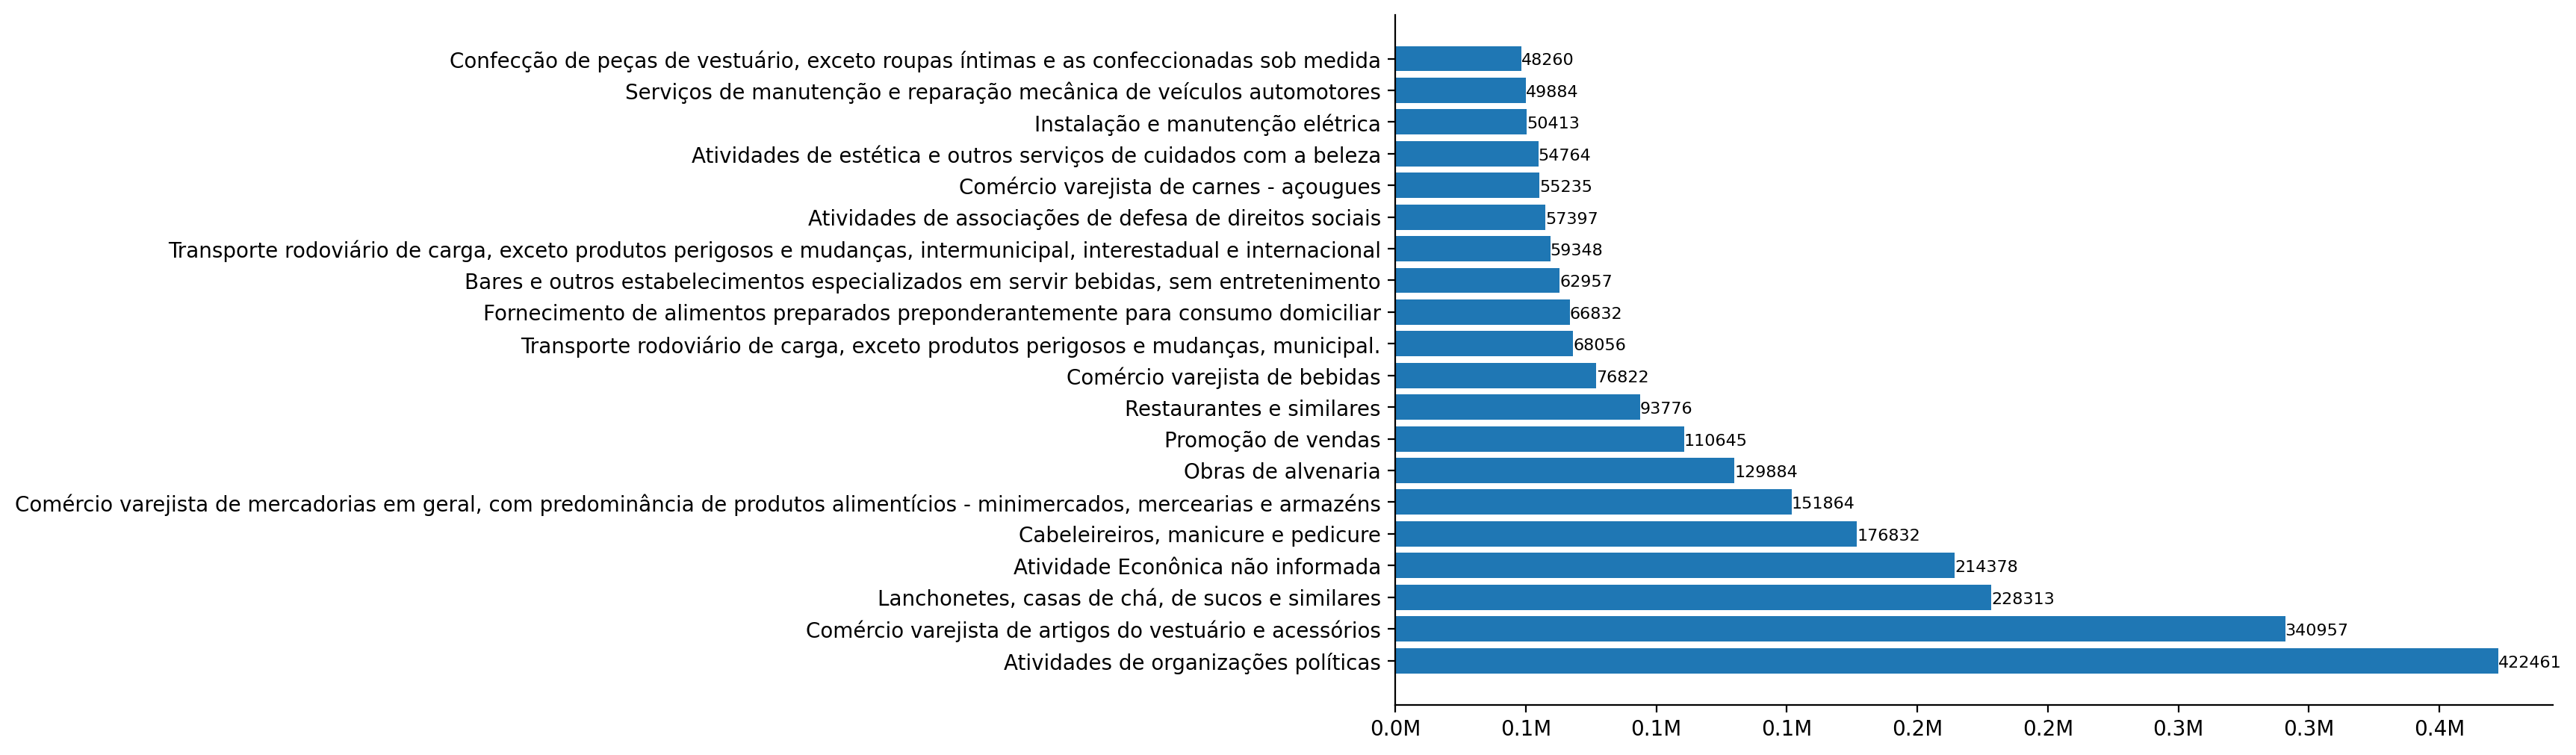

In [35]:
df_empresas_estab_mg['DATA DE INÍCIO ATIVIDADE'] = pd.to_datetime(df_empresas_estab_mg['DATA DE INÍCIO ATIVIDADE'])
df_count_year = df_empresas_estab_mg
df_count_year['y - DATA DE INÍCIO ATIVIDADE'] = df_count_year['DATA DE INÍCIO ATIVIDADE'].dt.strftime("%Y")
# values = df_count_year.groupby(['y - DATA DE INÍCIO ATIVIDADE', 'NATUREZA'])['cnpj'].count()
df_count_year = df_count_year.merge(df_cnaes, left_on ='CNAE FISCAL PRINCIPAL', right_on='CODIGO')
values = df_count_year.groupby(['NOME DA ATIVIDADE ECONÔMICA'])['cnpj'].count()

values = values.sort_values(ascending=False).head(20)
years = [str(x) for x in values.index[:20]]

fig = plt.figure(figsize=(10, 6), dpi=dpi)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(million_formatter)

ax.barh(years, values.values)
for i, v in enumerate(values.values):
    ax.text(v, i - 0.2 , str(v) , fontsize =8)

In [36]:
#Capital medio e qualificacoes
df_empresas_estab_mg['CAPITAL'] = df_empresas_estab_mg['CAPITAL'].apply(lambda x: x.replace(',', '.')).astype(float)

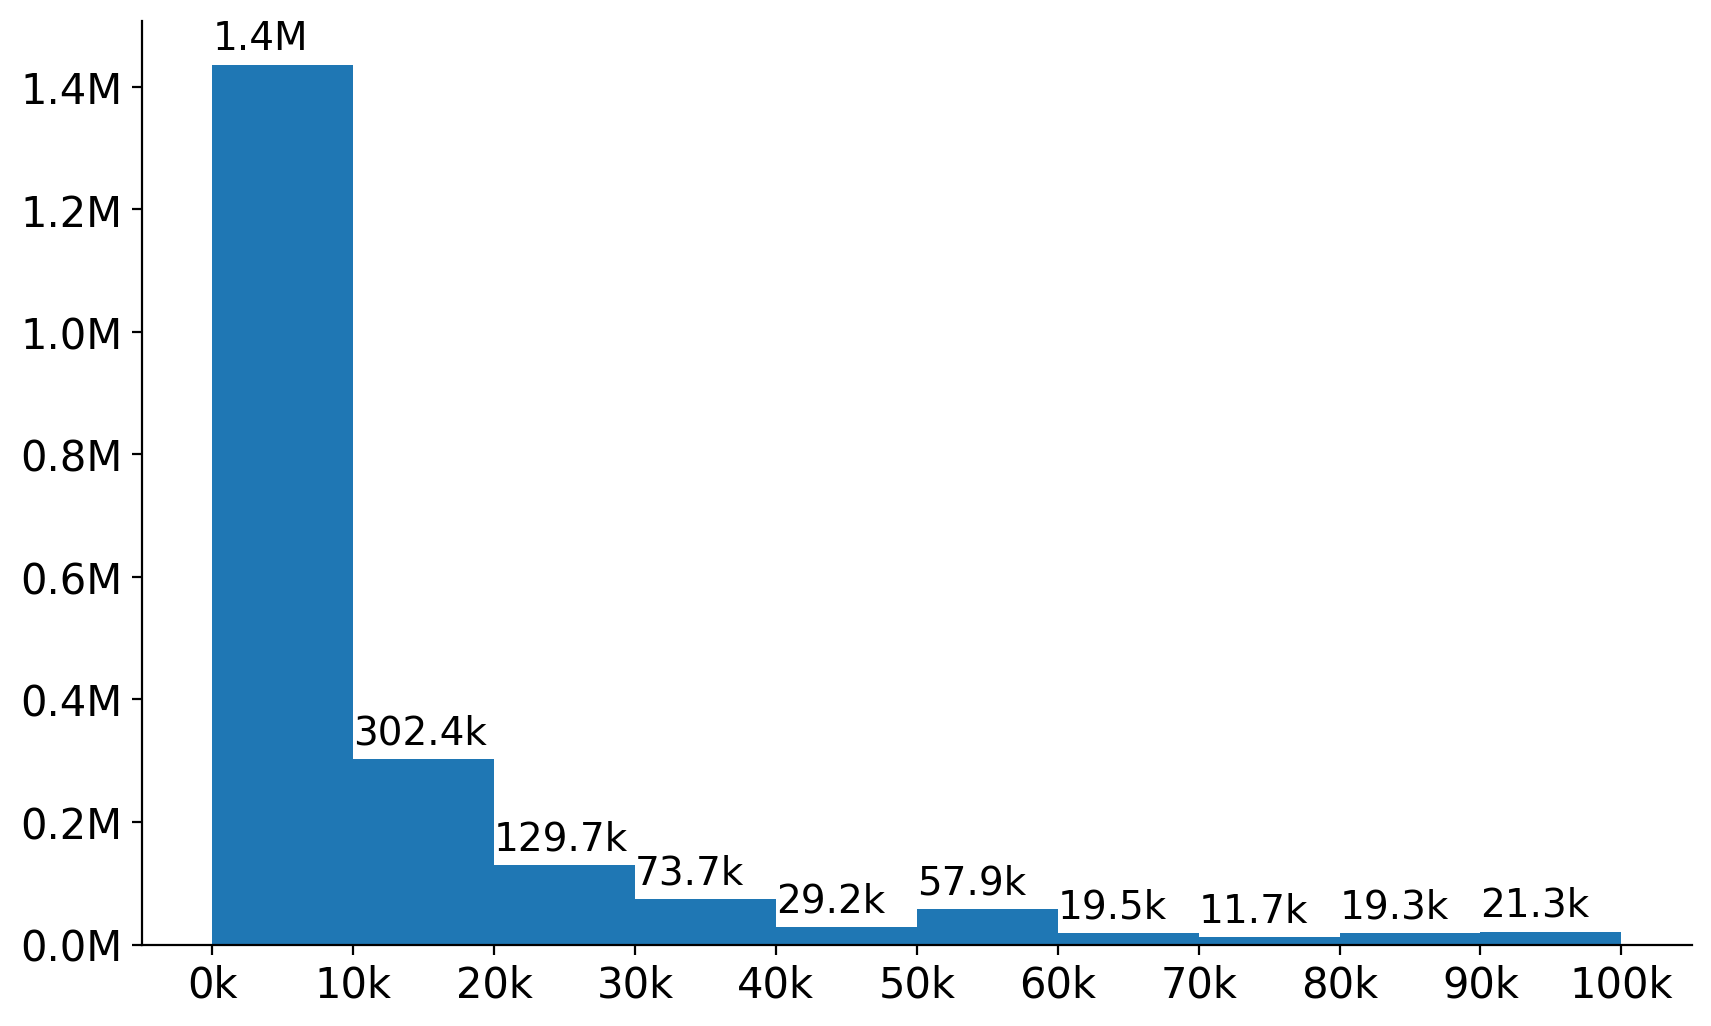

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Dados para o histograma
dados = df_empresas_estab_mg[(df_empresas_estab_mg['CAPITAL'] < 100000) & (df_empresas_estab_mg['SITUAÇÃO CADASTRAL'] == 2)]['CAPITAL']

# Cria a figura e o objeto ax
fig = plt.figure(figsize=(10, 6), dpi=dpi)
ax = plt.gca()
# Cria o histograma
hist = ax.hist(dados, bins=10)
for i, p in enumerate(ax.patches):
    if i in list(range(0, 10)):
        valor = p.get_height()
        if valor >= 1e6:
            valor_abreviado = '{:.1f}M'.format(valor/1e6)
        elif valor >= 1e3:
            valor_abreviado = '{:.1f}k'.format(valor/1e3)
        else:
            valor_abreviado = str(valor)
        ax.annotate(valor_abreviado, (p.get_x() + 0.1, p.get_height() + 25000), fontsize=14)
bins = hist[1]
bin_labels = ['{:.0f}k'.format(b/1000) for b in bins]
ax.set_xticks(bins)
ax.set_xticklabels(bin_labels)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_formatter(million_formatter)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
# Mostra o gráfico
plt.show()

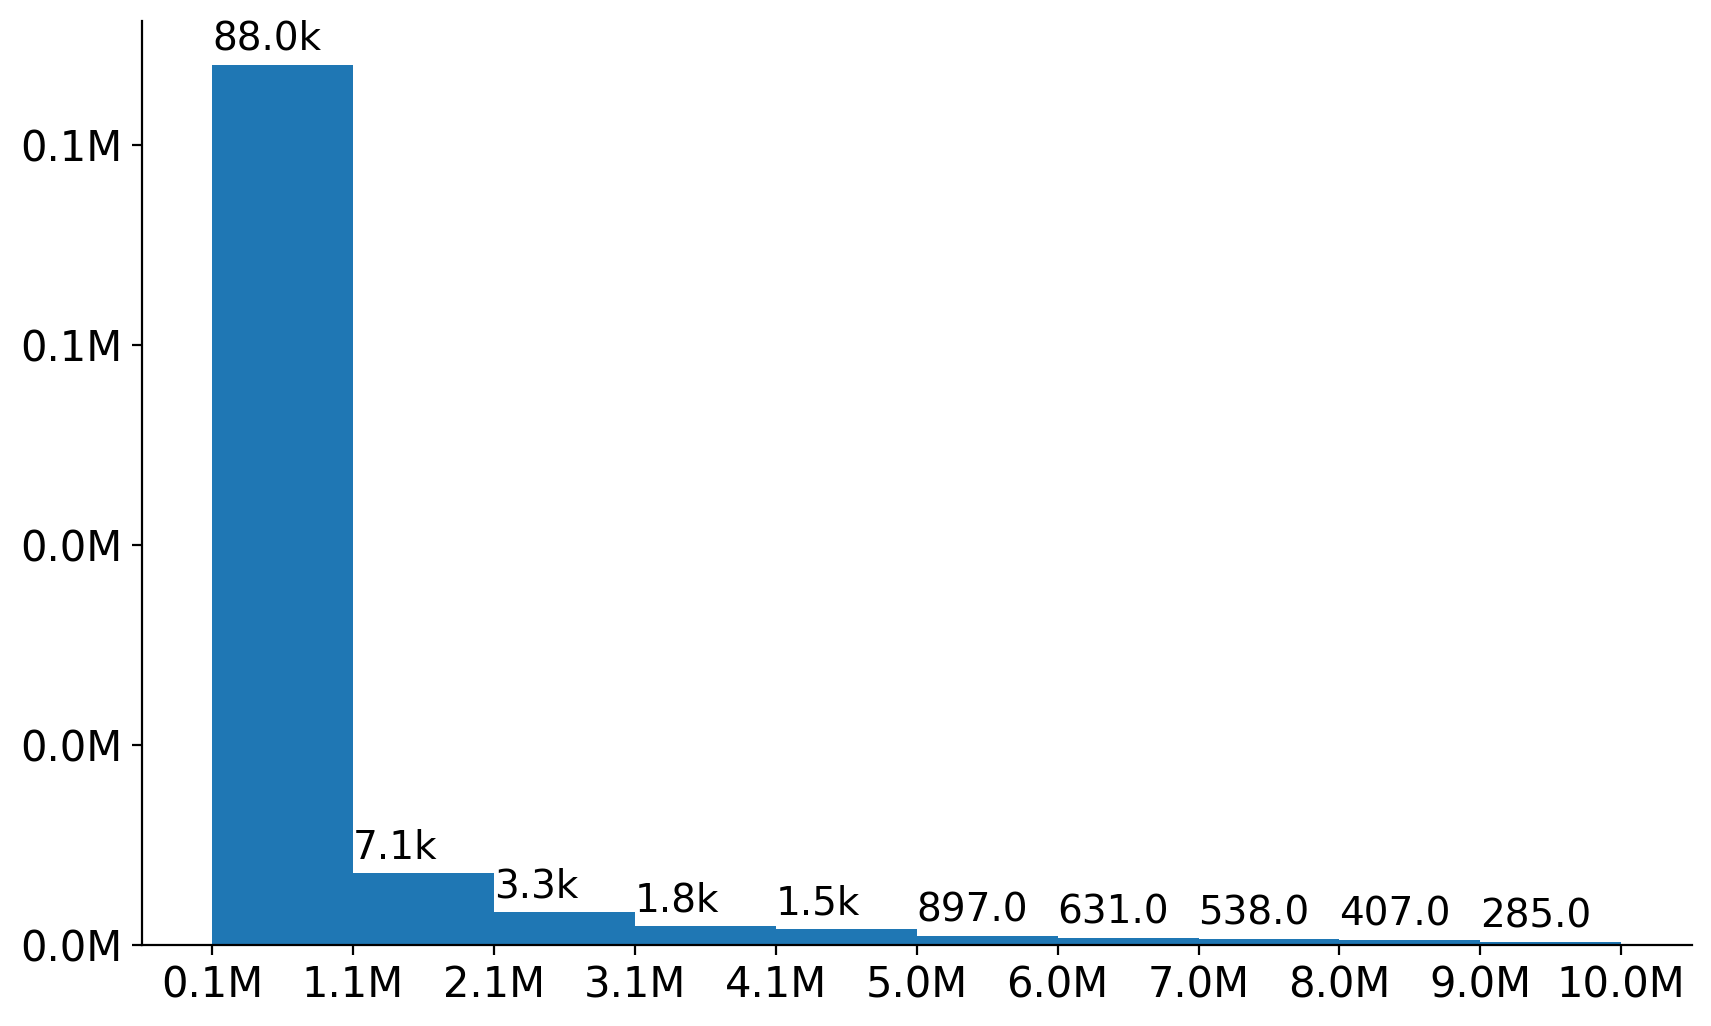

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Dados para o histograma
dados = df_empresas_estab_mg[(df_empresas_estab_mg['CAPITAL'] > 100000) & (df_empresas_estab_mg['CAPITAL'] < 10000000) &  (df_empresas_estab_mg['SITUAÇÃO CADASTRAL'] == 2)]['CAPITAL']

# Cria a figura e o objeto ax
fig = plt.figure(figsize=(10, 6), dpi=dpi)
ax = plt.gca()
# Cria o histograma
hist = ax.hist(dados, bins=10)
for i, p in enumerate(ax.patches):
    if i in list(range(0, 10)):
        valor = p.get_height()
        if valor >= 1e6:
            valor_abreviado = '{:.1f}M'.format(valor/1e6)
        elif valor >= 1e3:
            valor_abreviado = '{:.1f}k'.format(valor/1e3)
        else:
            valor_abreviado = str(valor)
        ax.annotate(valor_abreviado, (p.get_x() + 0.1, p.get_height() + 1500), fontsize=14)
bins = hist[1]
bin_labels = ['{:.0f}k'.format(b/1000) for b in bins]
ax.set_xticks(bins)
ax.set_xticklabels(bin_labels)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
@ticker.FuncFormatter
def billion_formatter(x, pos):
    return "%.0fB" % (x/1E9)



ax.yaxis.set_major_formatter(million_formatter)
ax.xaxis.set_major_formatter(million_formatter)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
# Mostra o gráfico
plt.show()

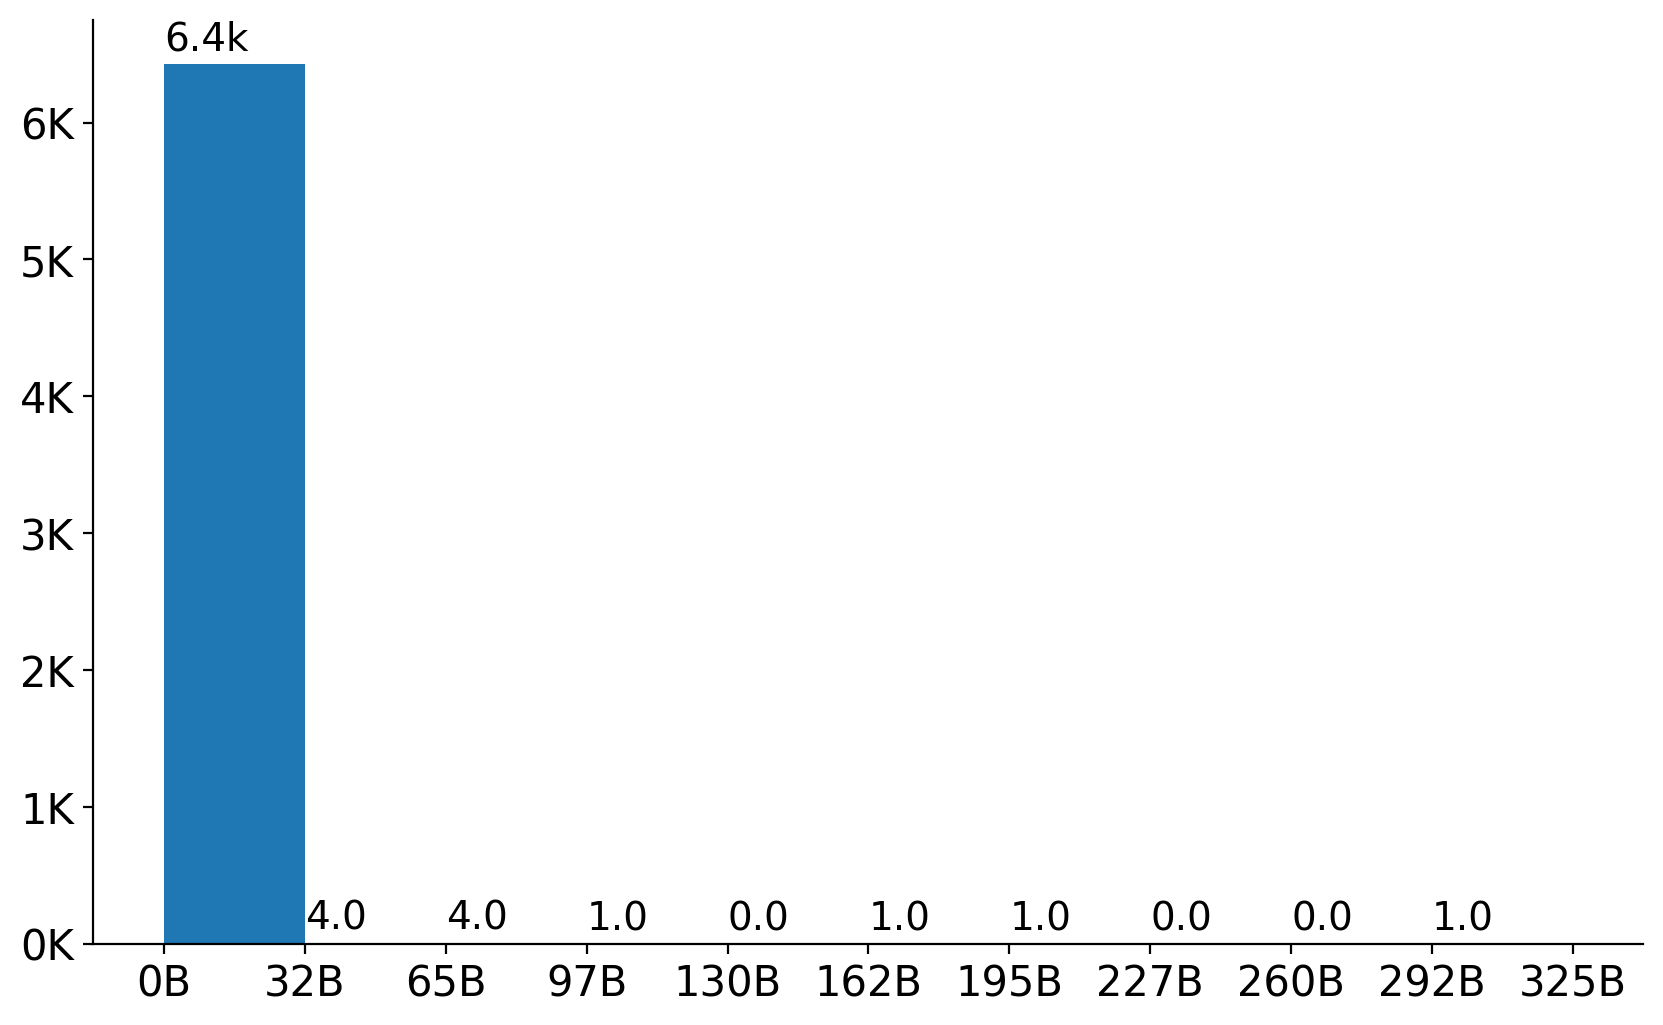

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Dados para o histograma
dados = df_empresas_estab_mg[(df_empresas_estab_mg['CAPITAL'] > 10000000) &  (df_empresas_estab_mg['SITUAÇÃO CADASTRAL'] == 2)]['CAPITAL']

# Cria a figura e o objeto ax
fig = plt.figure(figsize=(10, 6), dpi=dpi)
ax = plt.gca()
# Cria o histograma
hist = ax.hist(dados, bins=10)
for i, p in enumerate(ax.patches):
    if i in list(range(0, 10)):
        valor = p.get_height()
        if valor >= 1e6:
            valor_abreviado = '{:.1f}M'.format(valor/1e6)
        elif valor >= 1e3:
            valor_abreviado = '{:.1f}k'.format(valor/1e3)
        else:
            valor_abreviado = str(valor)
        ax.annotate(valor_abreviado, (p.get_x() + 0.1, p.get_height() + 100), fontsize=14)
bins = hist[1]
bin_labels = ['{:.0f}k'.format(b/1000) for b in bins]
ax.set_xticks(bins)
ax.set_xticklabels(bin_labels)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
@ticker.FuncFormatter
def billion_formatter(x, pos):
    return "%.0fB" % (x/1E9)

@ticker.FuncFormatter
def thousand_formatter(x, pos):
    return "%.0fK" % (x/1E3)

ax.yaxis.set_major_formatter(thousand_formatter)
ax.xaxis.set_major_formatter(billion_formatter)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
# Mostra o gráfico
plt.show()

Para empresas inativas

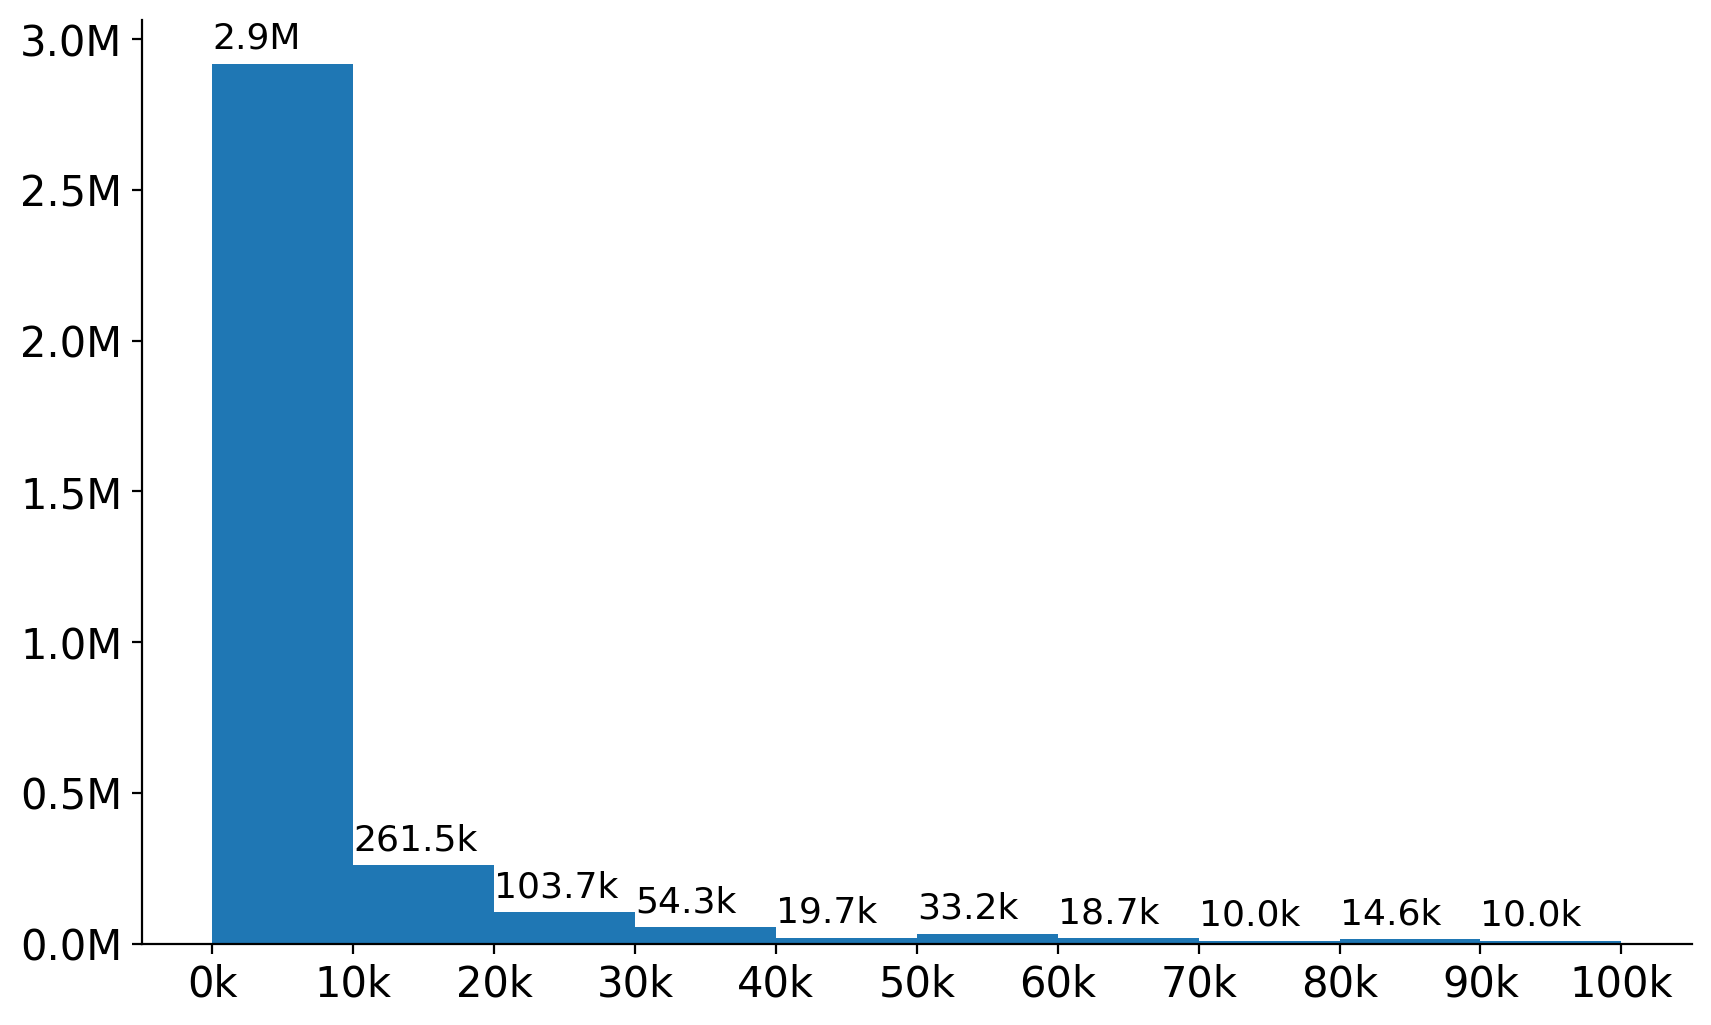

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Dados para o histograma
dados = df_empresas_estab_mg[(df_empresas_estab_mg['CAPITAL'] < 100000) &  (df_empresas_estab_mg['SITUAÇÃO CADASTRAL'] != 2)]['CAPITAL']

# Cria a figura e o objeto ax
fig = plt.figure(figsize=(10, 6), dpi=dpi)
ax = plt.gca()
# Cria o histograma
hist = ax.hist(dados, bins=10)
for i, p in enumerate(ax.patches):
    if i in list(range(0, 10)):
        valor = p.get_height()
        if valor >= 1e6:
            valor_abreviado = '{:.1f}M'.format(valor/1e6)
        elif valor >= 1e3:
            valor_abreviado = '{:.1f}k'.format(valor/1e3)
        else:
            valor_abreviado = str(valor)
        ax.annotate(valor_abreviado, (p.get_x() + 0.1, p.get_height() + 50000), fontsize=13)
bins = hist[1]
bin_labels = ['{:.0f}k'.format(b/1000) for b in bins]
ax.set_xticks(bins)
ax.set_xticklabels(bin_labels)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_formatter(million_formatter)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
# Mostra o gráfico
plt.show()

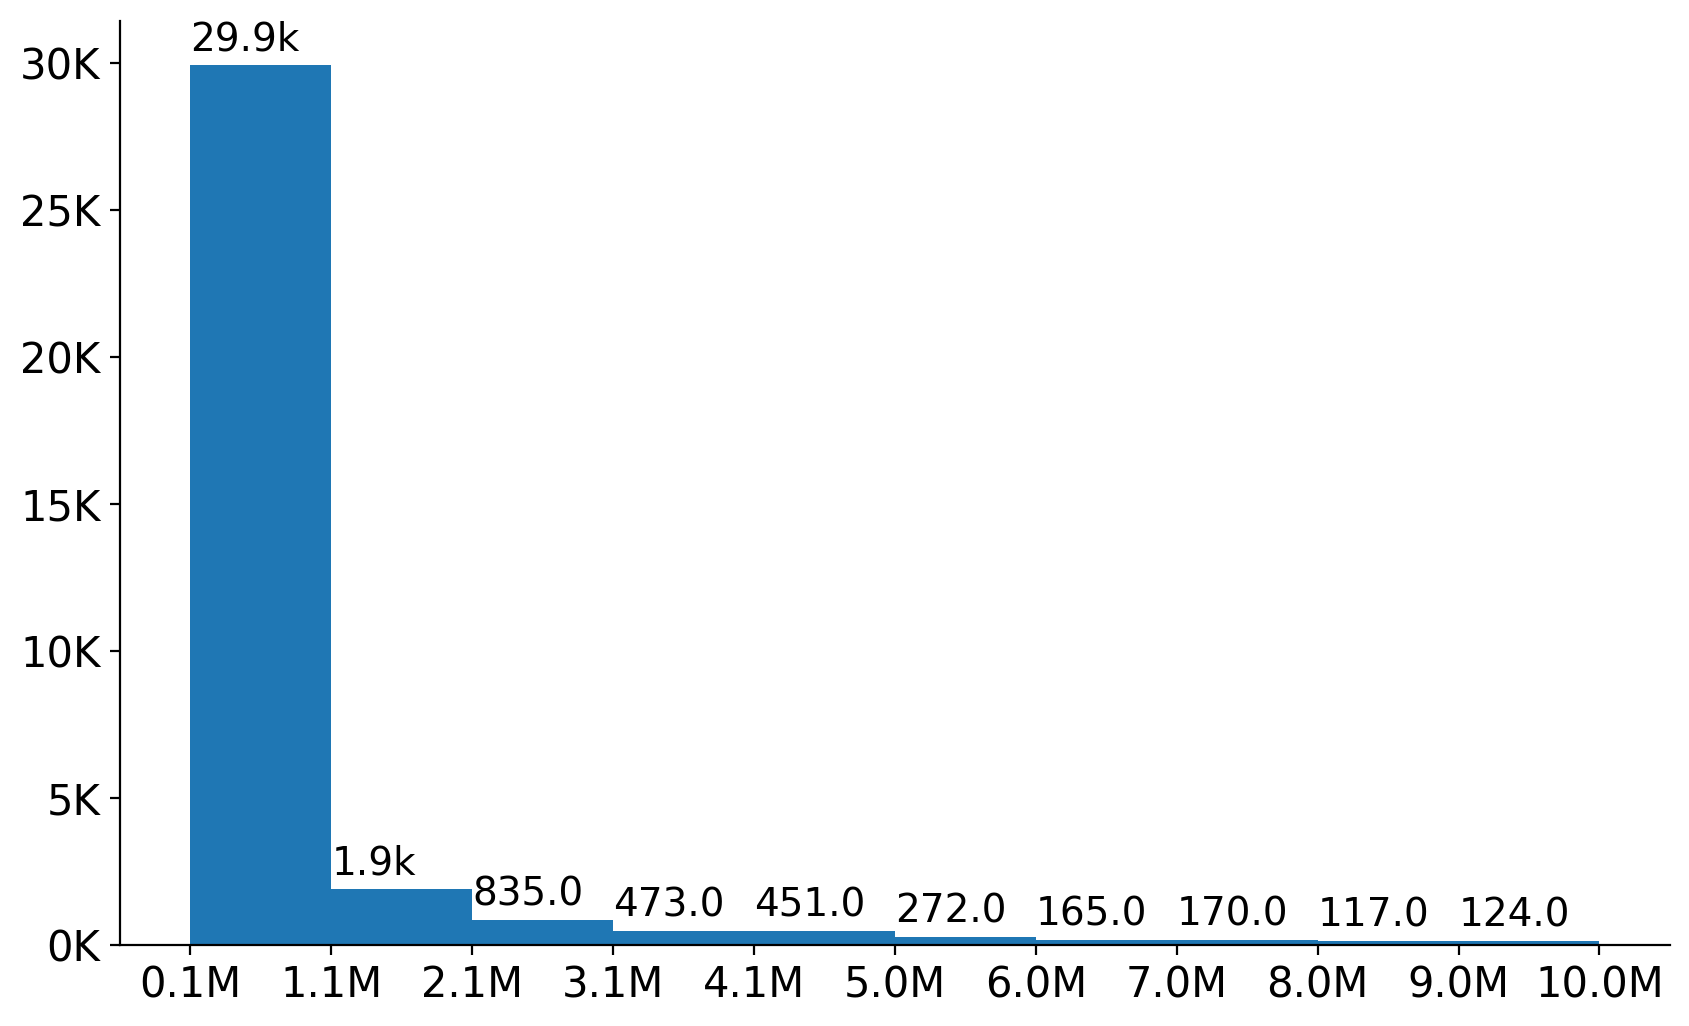

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Dados para o histograma
dados = df_empresas_estab_mg[(df_empresas_estab_mg['CAPITAL'] > 100000) & (df_empresas_estab_mg['CAPITAL'] < 10000000) &  (df_empresas_estab_mg['SITUAÇÃO CADASTRAL'] != 2)]['CAPITAL']

# Cria a figura e o objeto ax
fig = plt.figure(figsize=(10, 6), dpi=dpi)
ax = plt.gca()
# Cria o histograma
hist = ax.hist(dados, bins=10)
for i, p in enumerate(ax.patches):
    if i in list(range(0, 10)):
        valor = p.get_height()
        if valor >= 1e6:
            valor_abreviado = '{:.1f}M'.format(valor/1e6)
        elif valor >= 1e3:
            valor_abreviado = '{:.1f}k'.format(valor/1e3)
        else:
            valor_abreviado = str(valor)
        ax.annotate(valor_abreviado, (p.get_x() + 0.1, p.get_height() + 500), fontsize=14)
bins = hist[1]
bin_labels = ['{:.0f}k'.format(b/1000) for b in bins]
ax.set_xticks(bins)
ax.set_xticklabels(bin_labels)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
@ticker.FuncFormatter
def billion_formatter(x, pos):
    return "%.0fB" % (x/1E9)
@ticker.FuncFormatter
def thousand_formatter(x, pos):
    return "%.0fK" % (x/1E3)



ax.yaxis.set_major_formatter(thousand_formatter)
ax.xaxis.set_major_formatter(million_formatter)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
# Mostra o gráfico
plt.show()

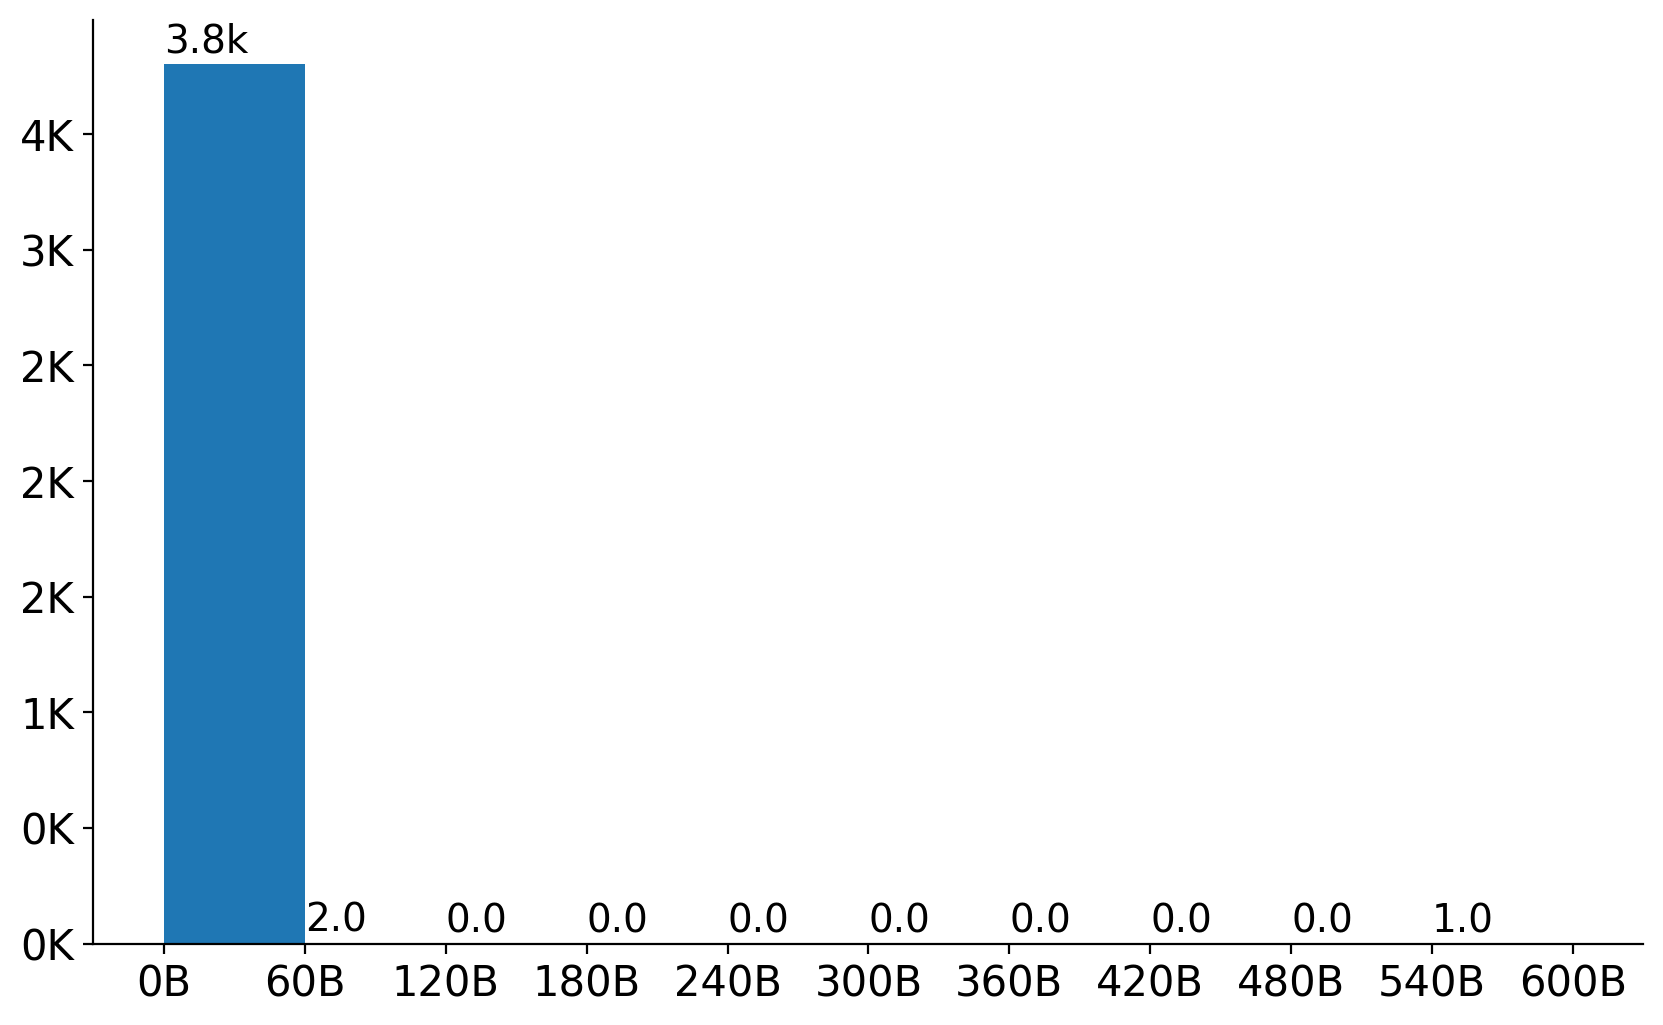

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Dados para o histograma
dados = df_empresas_estab_mg[(df_empresas_estab_mg['CAPITAL'] > 10000000) &  (df_empresas_estab_mg['SITUAÇÃO CADASTRAL'] != 2)]['CAPITAL']

# Cria a figura e o objeto ax
fig = plt.figure(figsize=(10, 6), dpi=dpi)
ax = plt.gca()
# Cria o histograma
hist = ax.hist(dados, bins=10)
for i, p in enumerate(ax.patches):
    if i in list(range(0, 10)):
        valor = p.get_height()
        if valor >= 1e6:
            valor_abreviado = '{:.1f}M'.format(valor/1e6)
        elif valor >= 1e3:
            valor_abreviado = '{:.1f}k'.format(valor/1e3)
        else:
            valor_abreviado = str(valor)
        ax.annotate(valor_abreviado, (p.get_x() + 0.1, p.get_height() + 50), fontsize=14)
bins = hist[1]
bin_labels = ['{:.0f}k'.format(b/1000) for b in bins]
ax.set_xticks(bins)
ax.set_xticklabels(bin_labels)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
@ticker.FuncFormatter
def billion_formatter(x, pos):
    return "%.0fB" % (x/1E9)

@ticker.FuncFormatter
def thousand_formatter(x, pos):
    return "%.0fK" % (x/1E3)

ax.yaxis.set_major_formatter(thousand_formatter)
ax.xaxis.set_major_formatter(billion_formatter)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
# Mostra o gráfico
plt.show()

Verificando as empresas segundo Qualificacoes do sócio principal

In [43]:
df_qualificacoes = pd.read_csv("data/Qualificacoes0.csv")

In [44]:
df_qualificacoes

,CODIGO,NOME DA QUALIFICAÇÃO DO SÓCIO
0,0,Não informada
1,5,Administrador
2,8,Conselheiro de Administração
3,9,Curador
4,10,Diretor
...,...,...
63,73,Presidente Residente ou Domiciliado no Exterior
64,74,Sócio-Administrador Residente ou Domiciliado n...
65,75,Fundador Residente ou Domiciliado no Exterior
66,78,Titular Pessoa Jurídica Domiciliada no Brasil


In [45]:
df_empresas_estab_mg['DATA SITUAÇÃO CADASTRAL'] = pd.to_datetime(df_empresas_estab_mg['DATA SITUAÇÃO CADASTRAL'])
indexes =  df_qualificacoes['NOME DA QUALIFICAÇÃO DO SÓCIO']

df_count_year = df_empresas_estab_mg[df_empresas_estab_mg['SITUAÇÃO CADASTRAL'] != 2]
df_count_year['y - DATA SITUAÇÃO CADASTRAL'] = df_count_year['DATA SITUAÇÃO CADASTRAL'].dt.strftime("%Y")
df_count_year = df_count_year.merge(df_qualificacoes, left_on ='QUALIFICAÇÃO', right_on='CODIGO')

values = df_count_year.groupby(['NOME DA QUALIFICAÇÃO DO SÓCIO'])['cnpj'].count()

for idx in indexes:
    if idx not in values.index:
        values[idx] = 0

values = values.sort_values(ascending=False)


df_count_year = df_empresas_estab_mg[df_empresas_estab_mg['SITUAÇÃO CADASTRAL'] == 2]

df_count_year['y - DATA SITUAÇÃO CADASTRAL'] = df_count_year['DATA SITUAÇÃO CADASTRAL'].dt.strftime("%Y")
df_count_year = df_count_year.merge(df_qualificacoes, left_on ='QUALIFICAÇÃO', right_on='CODIGO')

values_open = df_count_year.groupby(['NOME DA QUALIFICAÇÃO DO SÓCIO'])['cnpj'].count()
for idx in indexes:
    if idx not in values_open.index:
        values_open[idx] = 0
values_open = values_open.sort_values(ascending=False)

# fig = plt.figure(figsize=(10, 6), dpi=dpi)
# ax = plt.gca()

df_plot = pd.DataFrame({'values_open':values_open, 'values':values,'index':indexes})

df_plot['order'] = df_plot['values_open'] + df_plot['values']
df_plot = df_plot.sort_values(by='order', ascending=False).head(20)
df_plot = df_plot[['values_open','values']]
df_plot.columns = ['Empresas abertas', 'Empresas fechadas']
df_plot['Total de empresas'] = df_plot['Empresas abertas'] + df_plot['Empresas fechadas']
df_plot.to_csv('qualificacoes_20.csv', sep=';')
df_plot

C:\Users\leand\AppData\Local\Temp\ipykernel_14192\2083717546.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_year['y - DATA SITUAÇÃO CADASTRAL'] = df_count_year['DATA SITUAÇÃO CADASTRAL'].dt.strftime("%Y")
C:\Users\leand\AppData\Local\Temp\ipykernel_14192\2083717546.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_year['y - DATA SITUAÇÃO CADASTRAL'] = df_count_year['DATA SITUAÇÃO CADASTRAL'].dt.strftime("%Y")


,Empresas abertas,Empresas fechadas,Total de empresas
Empresário,1535862.0,2083208.0,3619070.0
Sócio-Administrador,546176.0,858075.0,1404251.0
Candidato a cargo Político Eletivo,45.0,369244.0,369289.0
Presidente,82328.0,123734.0,206062.0
Síndico (Condomínio),44260.0,684.0,44944.0
Administrador,31865.0,10713.0,42578.0
Titular Pessoa Física Residente ou Domiciliado no Brasil,6319.0,20883.0,27202.0
Titular de Empresa Individual Imobiliária,670.0,17485.0,18155.0
Sócio-Gerente,293.0,14525.0,14818.0
Diretor,4825.0,2715.0,7540.0


In [46]:
df_empresas_estab_mg['PORTE'] = df_empresas_estab_mg['PORTE'].fillna(0)



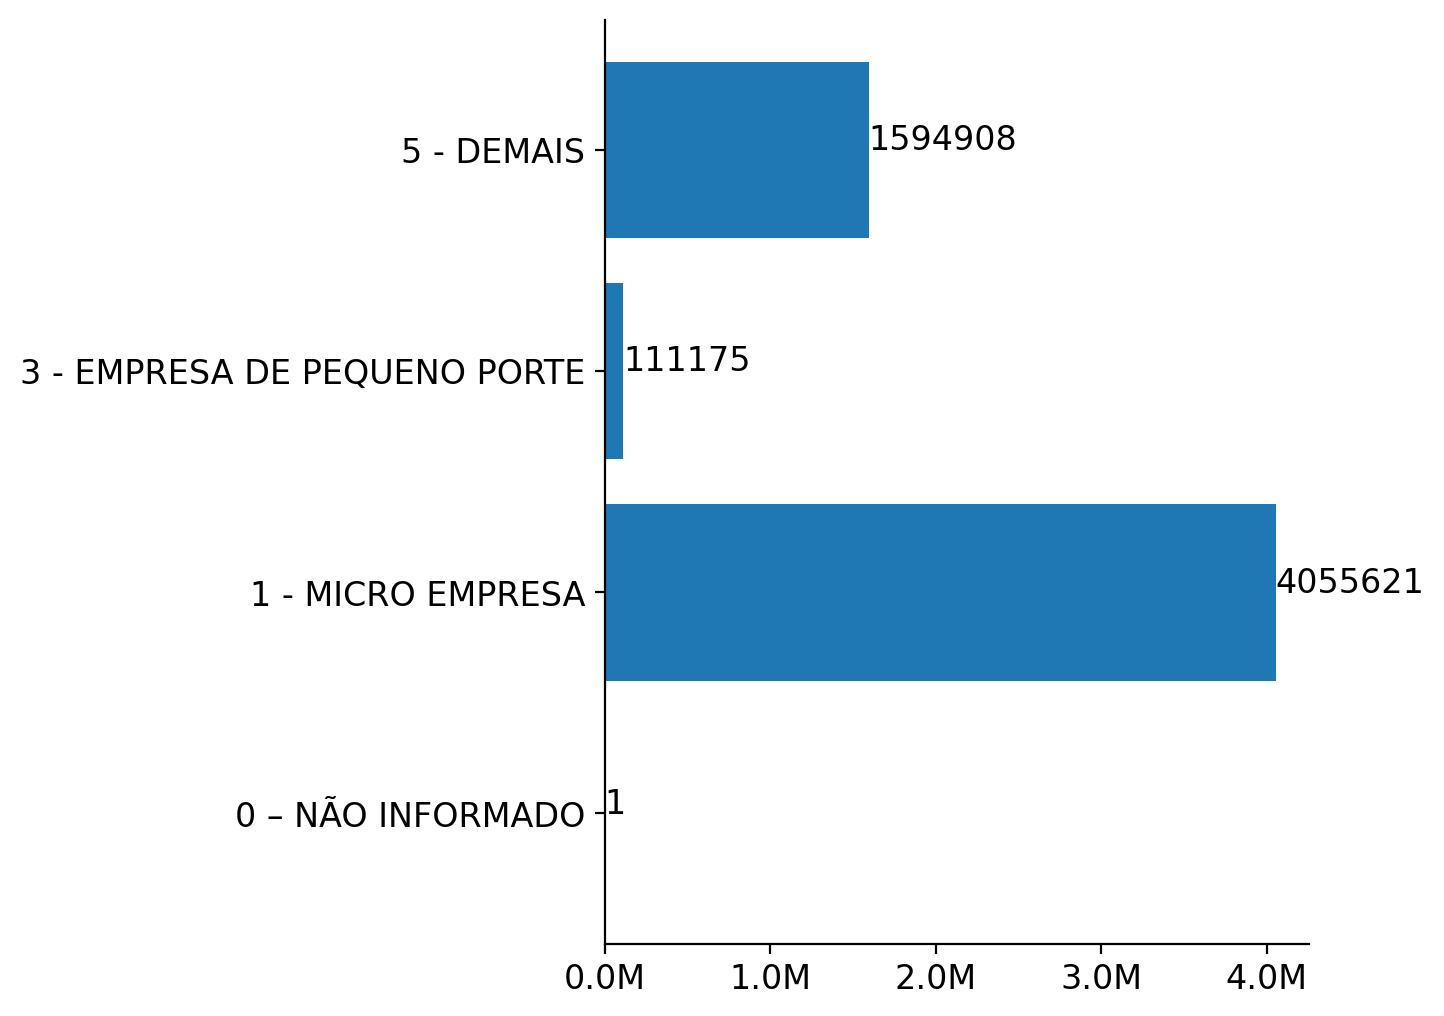

In [47]:
#names = ['1 - Nula', '2 - Ativa', '3 - Suspensa', '4 - Inapta ', '8 - Baixada']
names =['0 – NÃO INFORMADO', '1 - MICRO EMPRESA',  '3 - EMPRESA DE PEQUENO PORTE', '5 - DEMAIS']
@ticker.FuncFormatter
def million_formatter(x, pos):
    return "%.1fM" % (x/1E6)

dpi = 200
values = df_empresas_estab_mg.groupby('PORTE')['cnpj'].count().values
fig = plt.figure(figsize=(10, 6), dpi=dpi)
ax=fig.add_subplot(121)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(million_formatter)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

ax.barh(names, values)
for i, v in enumerate(values):
    ax.text(v + 3, i , str(v), fontsize=12)


In [48]:
df_empresas_estab_mg['PORTE_TRATADO'] = df_empresas_estab_mg['PORTE'].replace({0.0: '0 – NÃO INFORMADO',  1.0:'1 - MICRO EMPRESA', 3.0:'3 - EMPRESA DE PEQUENO PORTE' , 5.0: '5 - DEMAIS'})

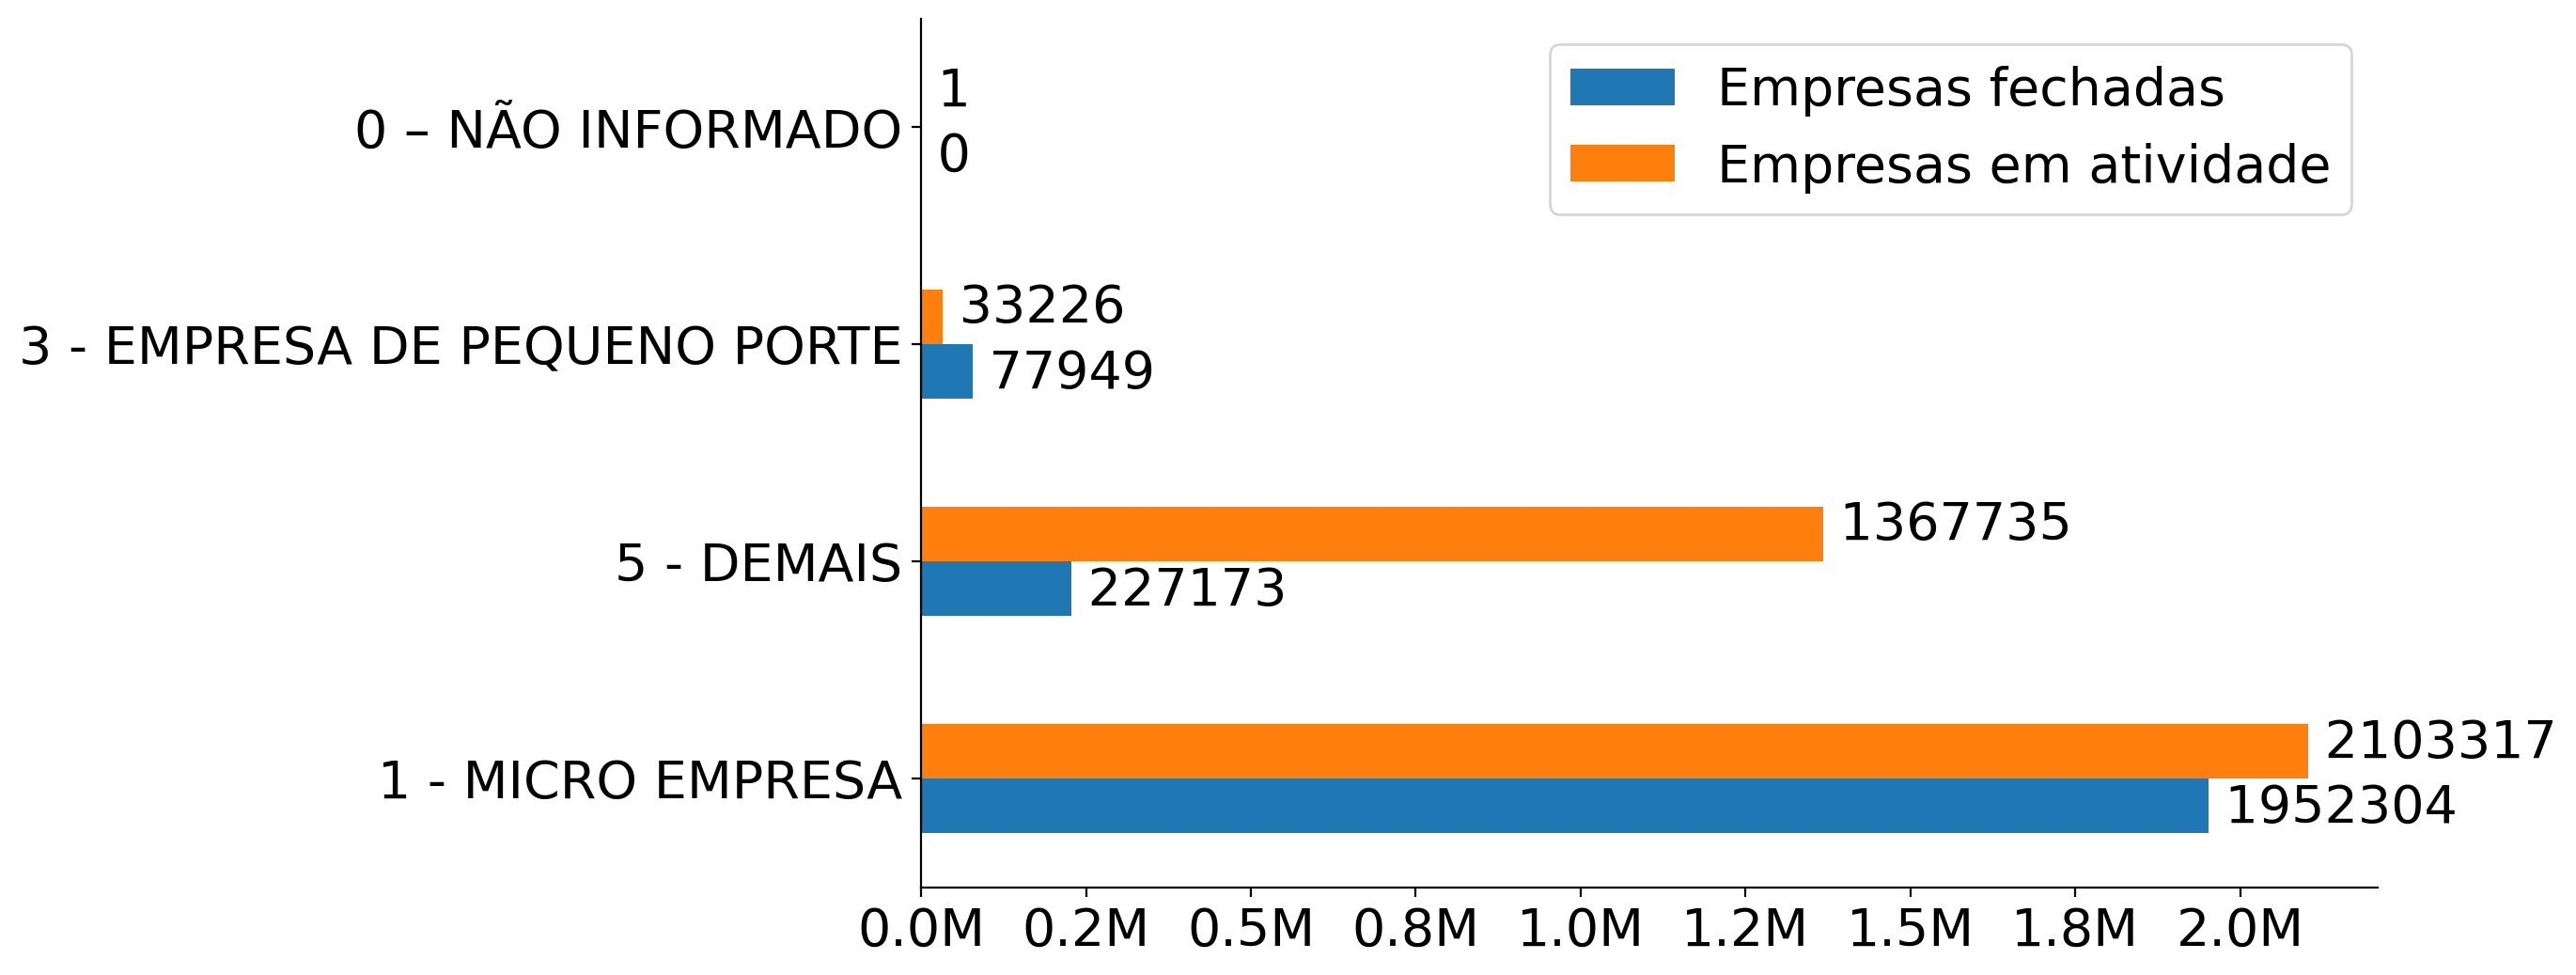

In [49]:
df_empresas_estab_mg['DATA SITUAÇÃO CADASTRAL'] = pd.to_datetime(df_empresas_estab_mg['DATA SITUAÇÃO CADASTRAL'])

df_count_year = df_empresas_estab_mg[df_empresas_estab_mg['SITUAÇÃO CADASTRAL'] != 2]
indexes = df_empresas_estab_mg['PORTE_TRATADO'].unique()
values = df_count_year.groupby(['PORTE_TRATADO'])['cnpj'].count()

for idx in indexes:
    if idx not in values.index:
        values[idx] = 0
    
values = values.sort_values(ascending=False)


df_count_year = df_empresas_estab_mg[df_empresas_estab_mg['SITUAÇÃO CADASTRAL'] == 2]


values_open = df_count_year.groupby(['PORTE_TRATADO'])['cnpj'].count()
for idx in indexes:
    if idx not in values_open.index:
        values_open[idx] = 0
values_open = values_open.sort_values(ascending=False)

fig = plt.figure(figsize=(10, 6), dpi=dpi)
ax = plt.gca()

df_plot = pd.DataFrame({'values_open':values_open, 'values':values,'index':indexes})
df_plot['order'] = df_plot['values_open'] + df_plot['values']

df_plot = df_plot.sort_values(by='order', ascending=False).head(5)
df_plot.drop(columns='order', inplace=True)

df_plot.plot.barh(ax=ax, xlabel='')
ax.legend(["Empresas fechadas", "Empresas em atividade"], fontsize=20);

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(million_formatter)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set(ylabel=None)

for i, v in enumerate(df_plot['values_open']):
    ax.text(v, i - 0.2 , ' '+ str(v) , fontsize=20)
for i, v in enumerate(df_plot['values']):
    ax.text(v, i + 0.1 , ' '+str(v) , fontsize=20)